In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/'

In [3]:
x1ds = np.hstack((glob.glob('{}*0_x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path)), glob.glob('{}*x1dsum.fits'.format(path))))
x1ds


array(['/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oei103010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo14010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo14020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo14030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo15010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo15020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo15030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oei104010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16040_sx1.fits'],
      dtype='<U67')

/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oei103010_x1d.fits
G140M
403.75333


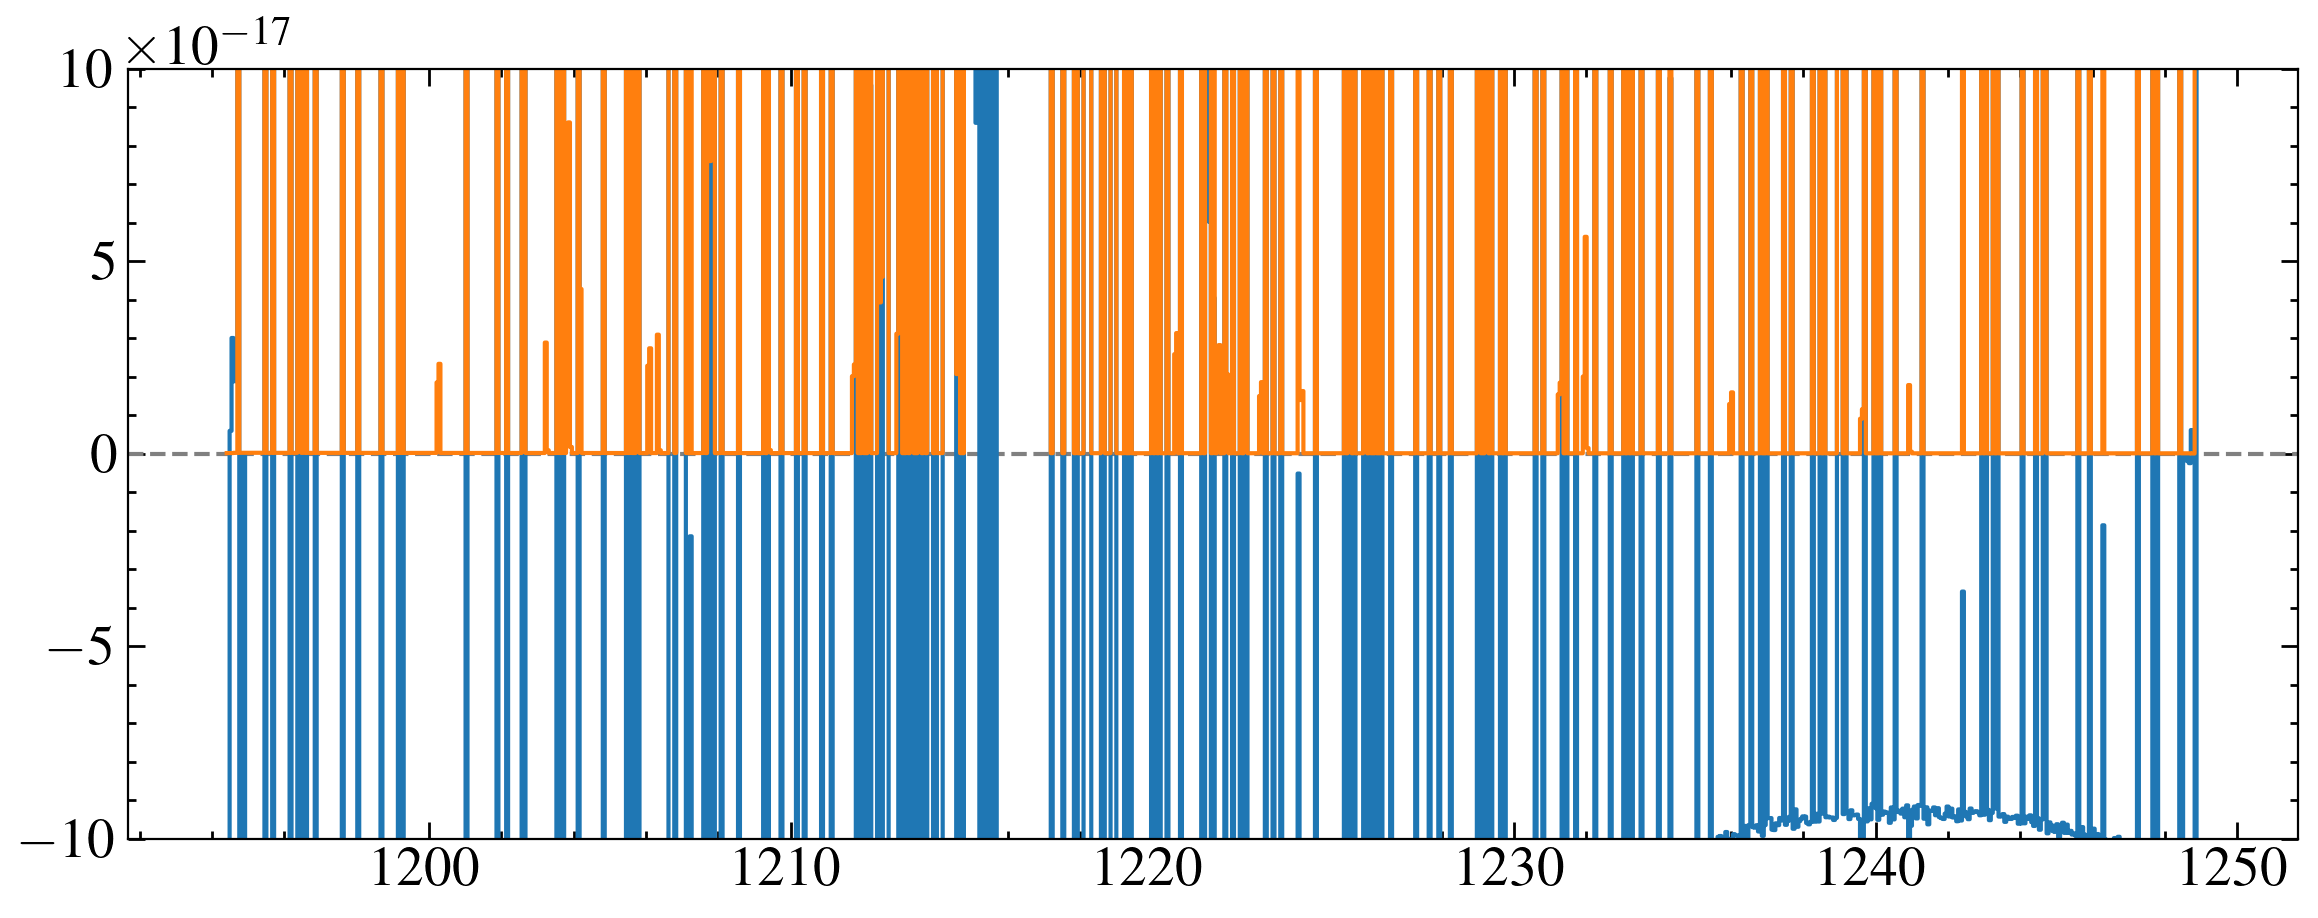

/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo14010_x1d.fits
G140L
514.2295


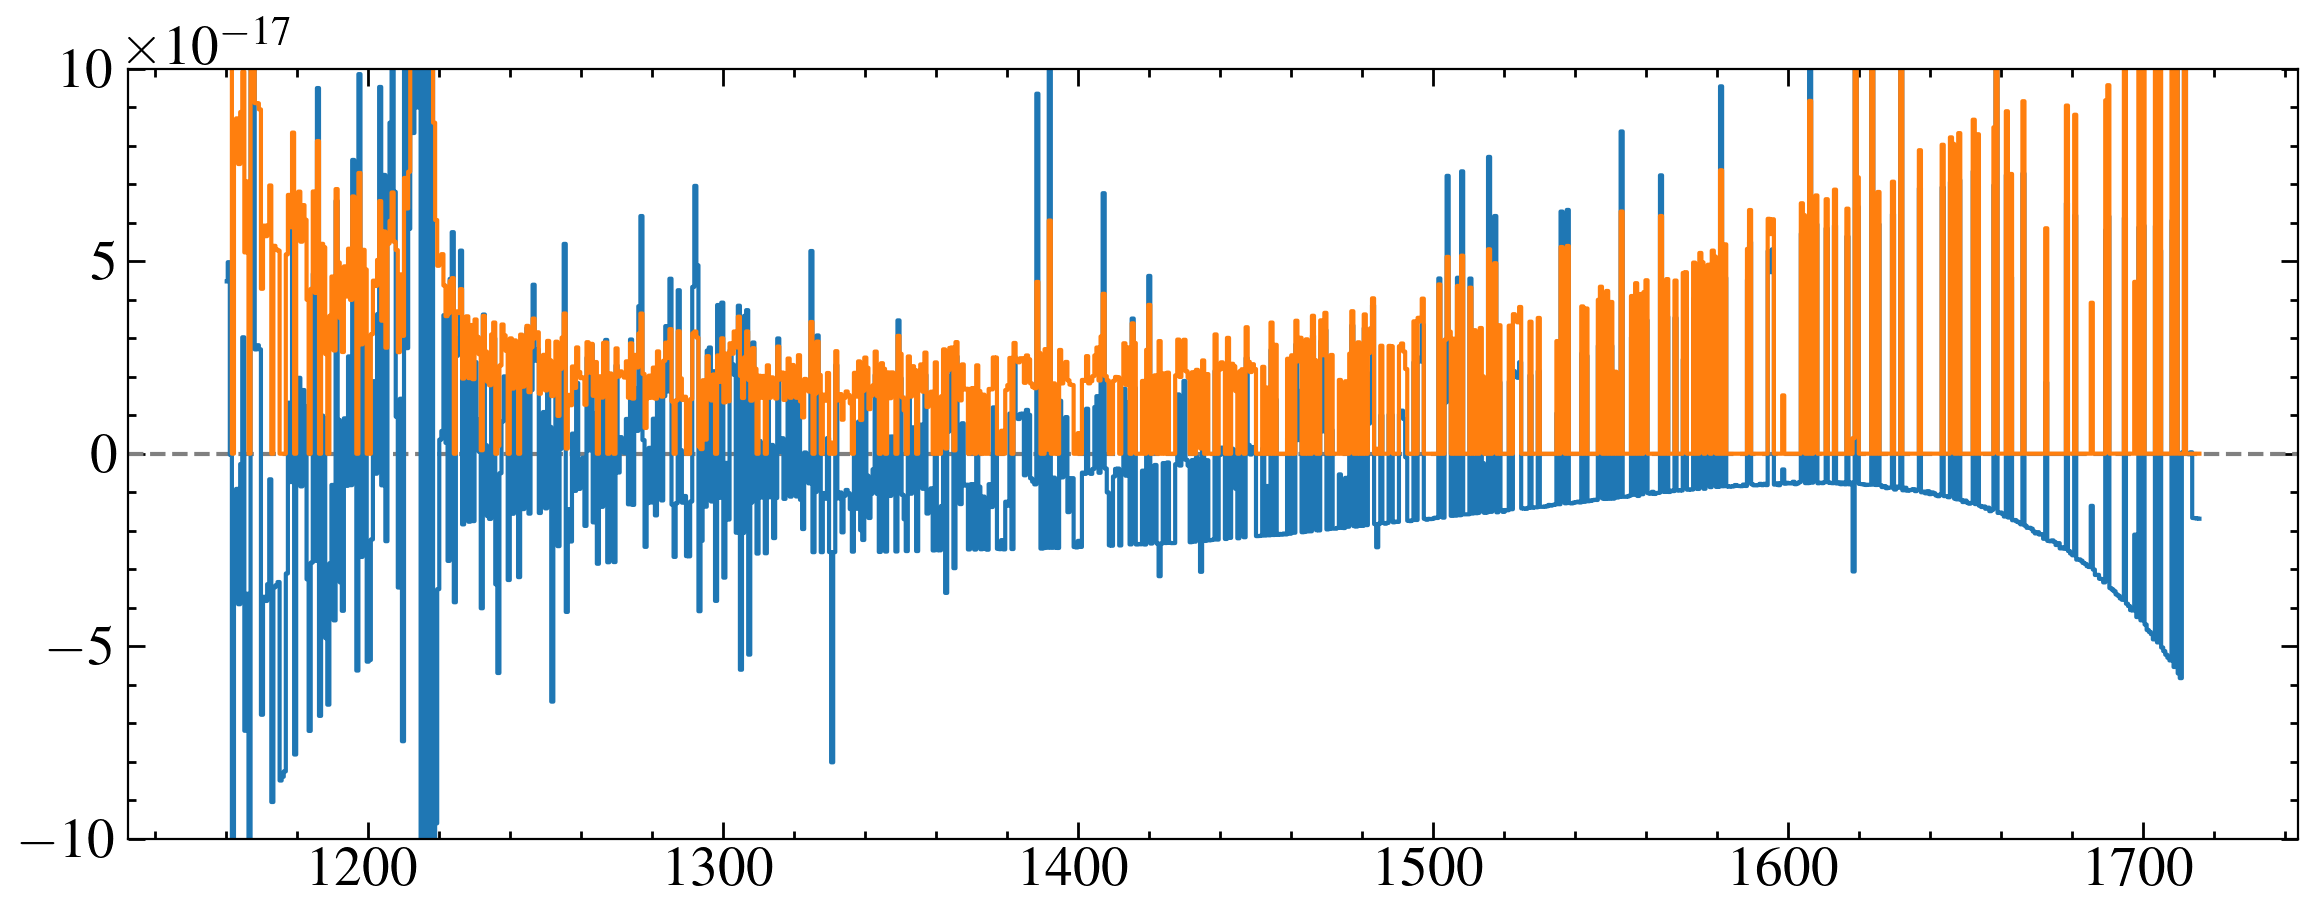

/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo14020_x1d.fits
G140L
514.3294


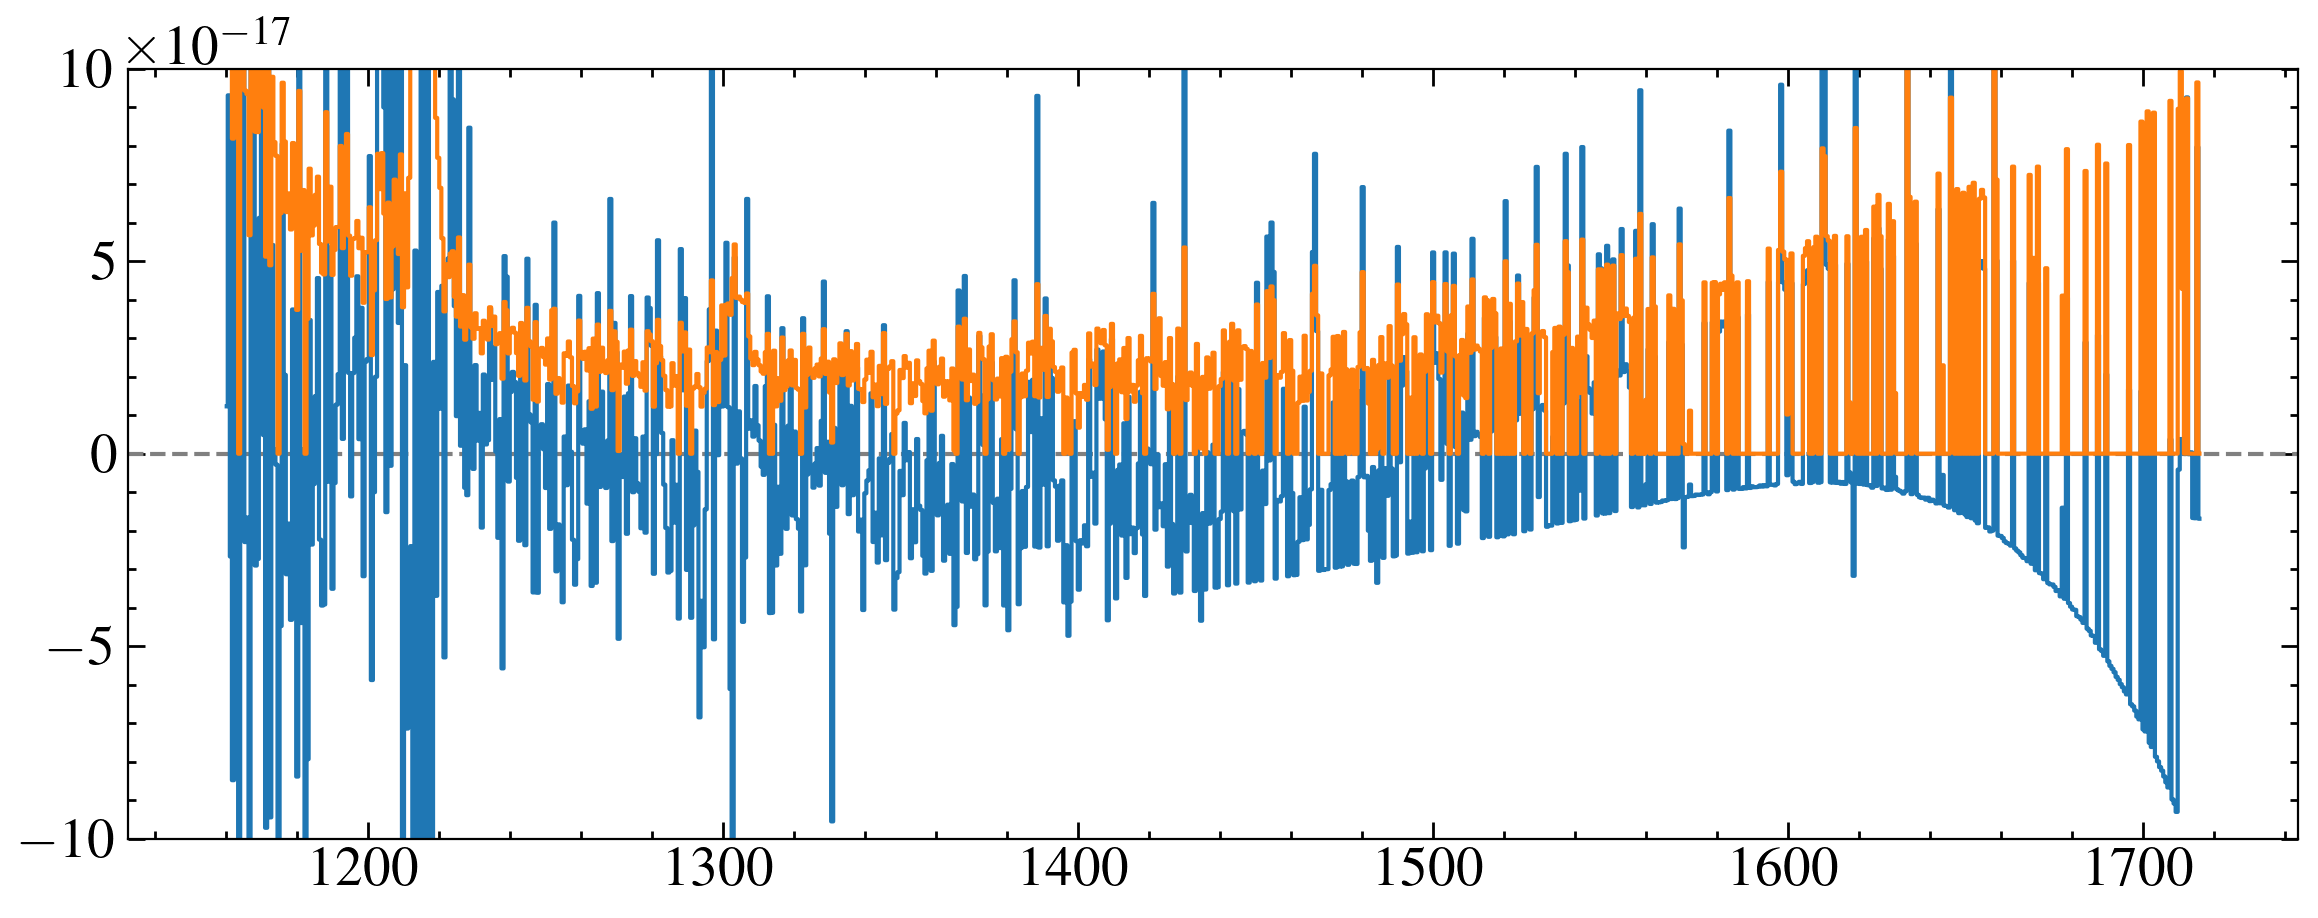

/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo14030_x1d.fits
G140L
514.2828


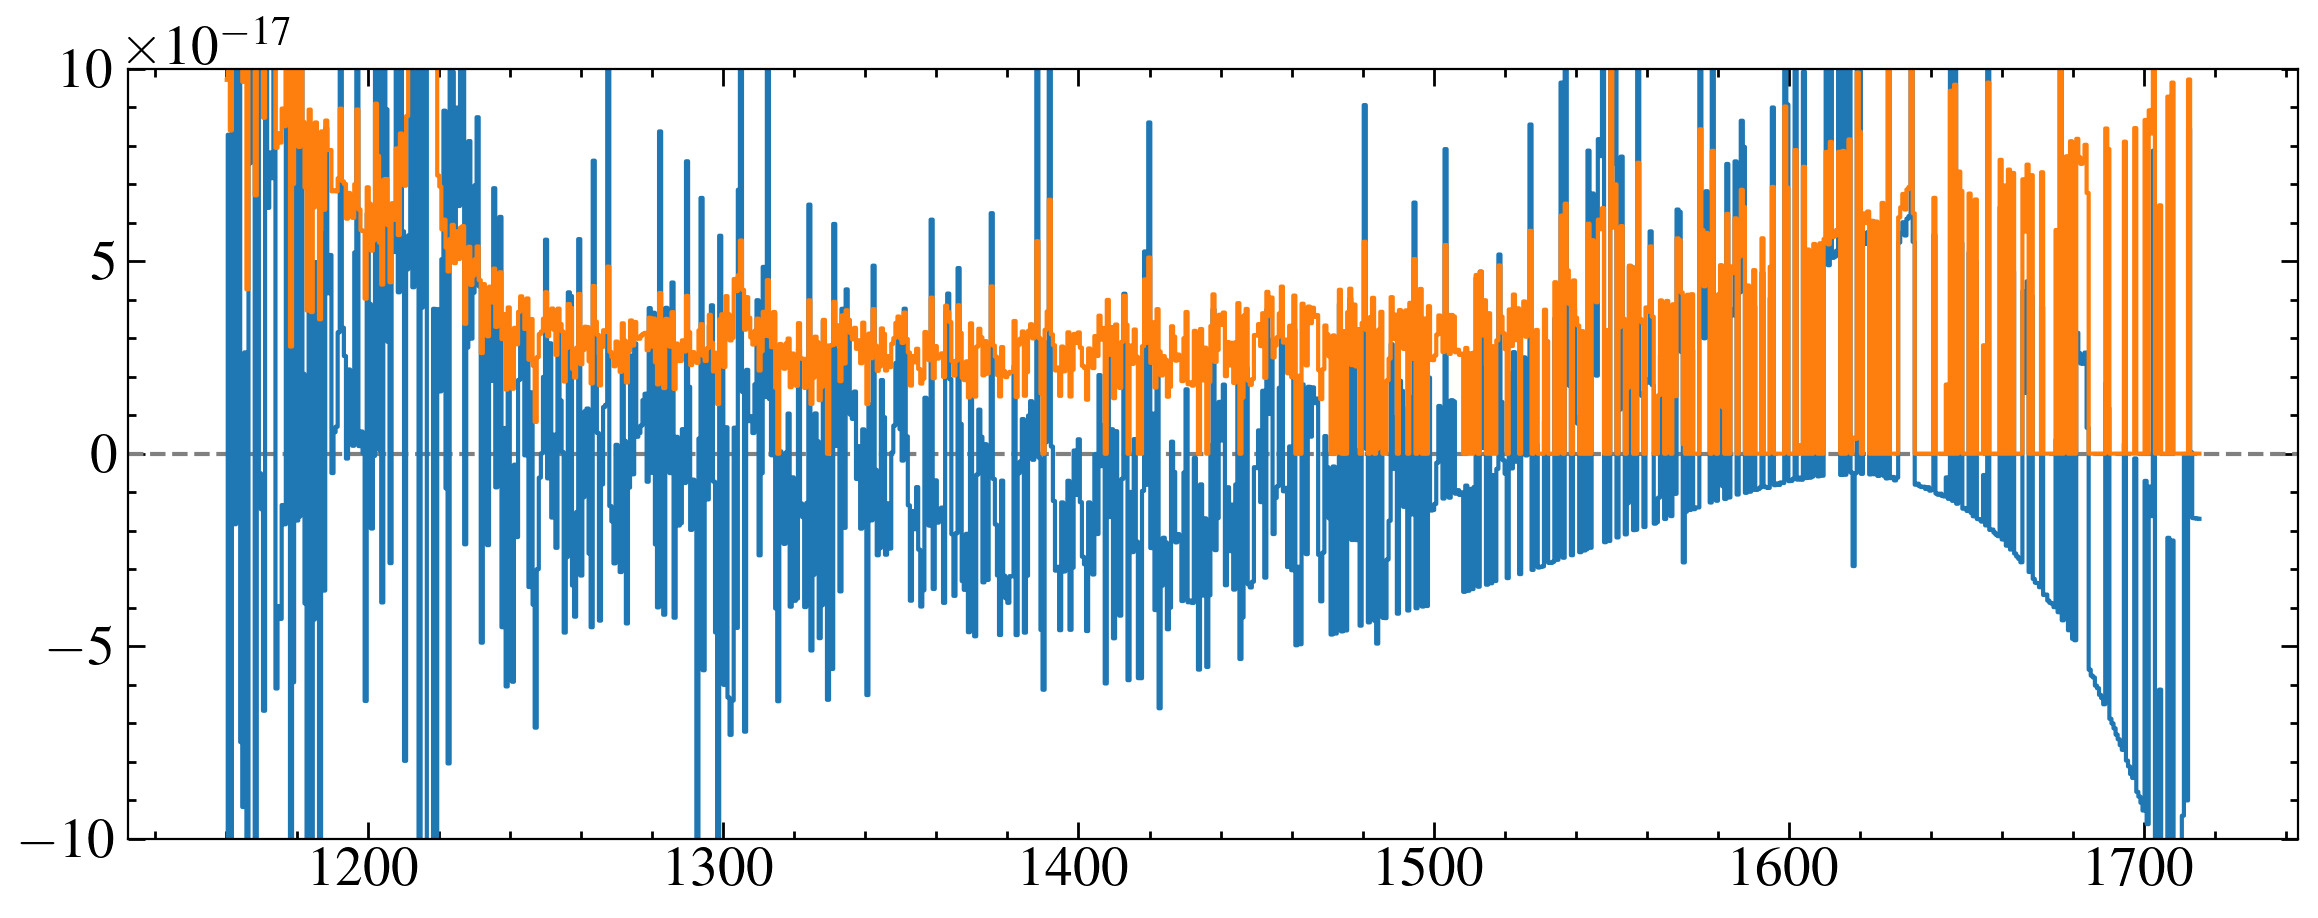

/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo15010_x1d.fits
G140L
143.5563


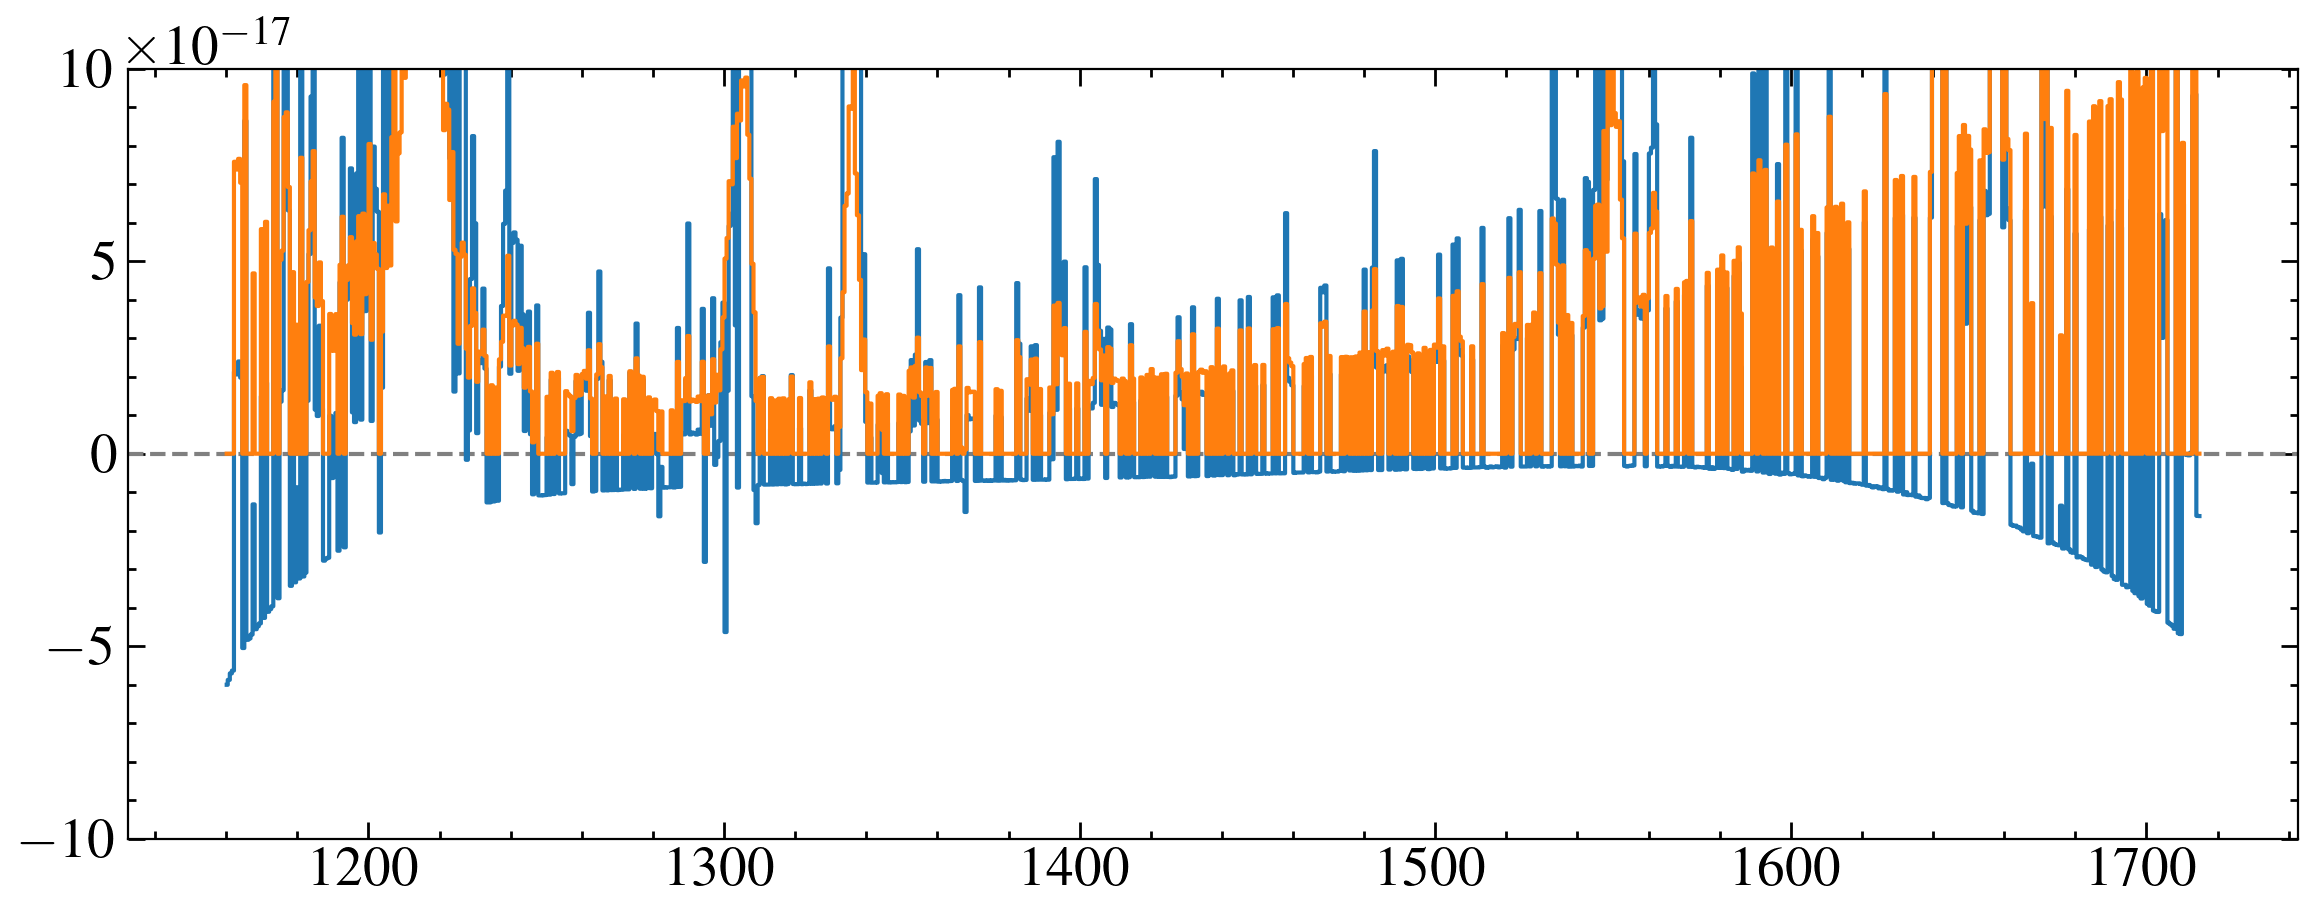

/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16020_x1d.fits
G140M
153.23633


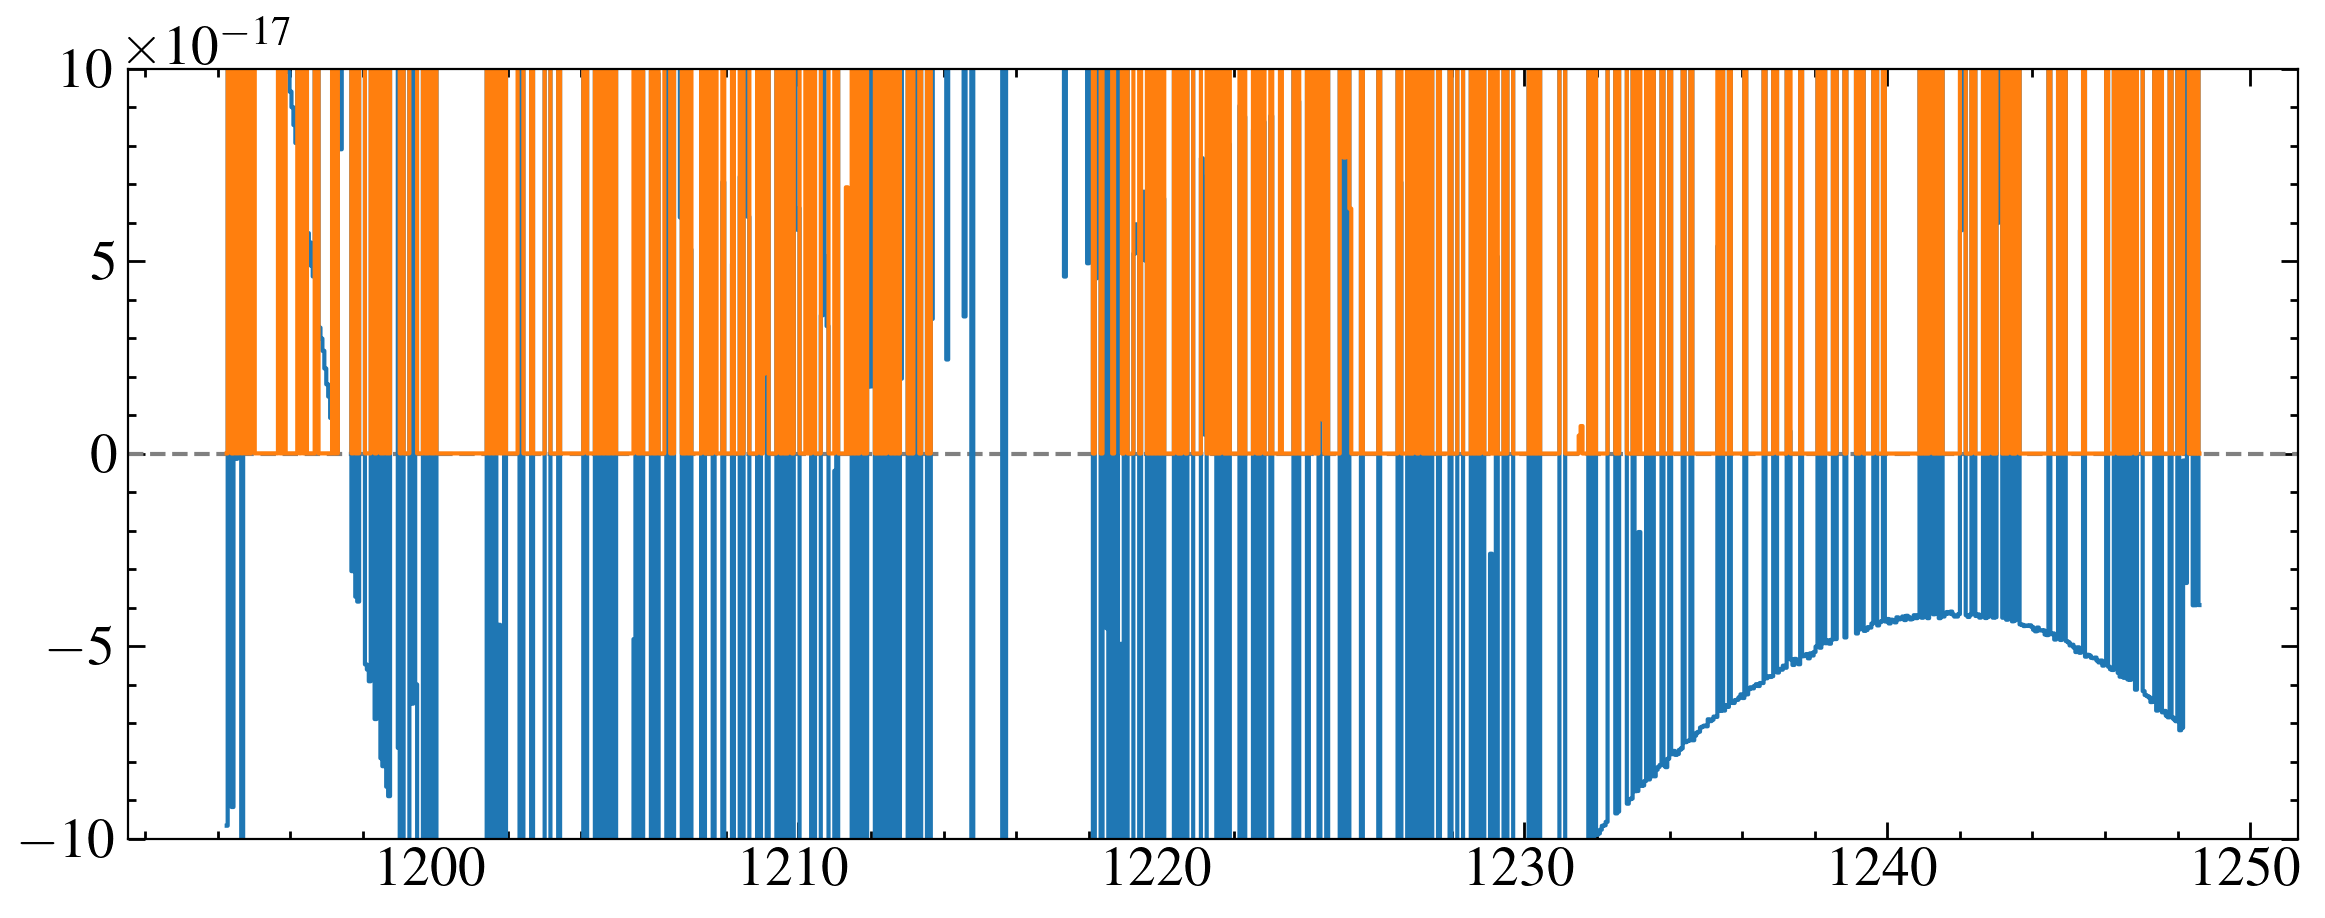

/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16030_x1d.fits
G230L
547.3228


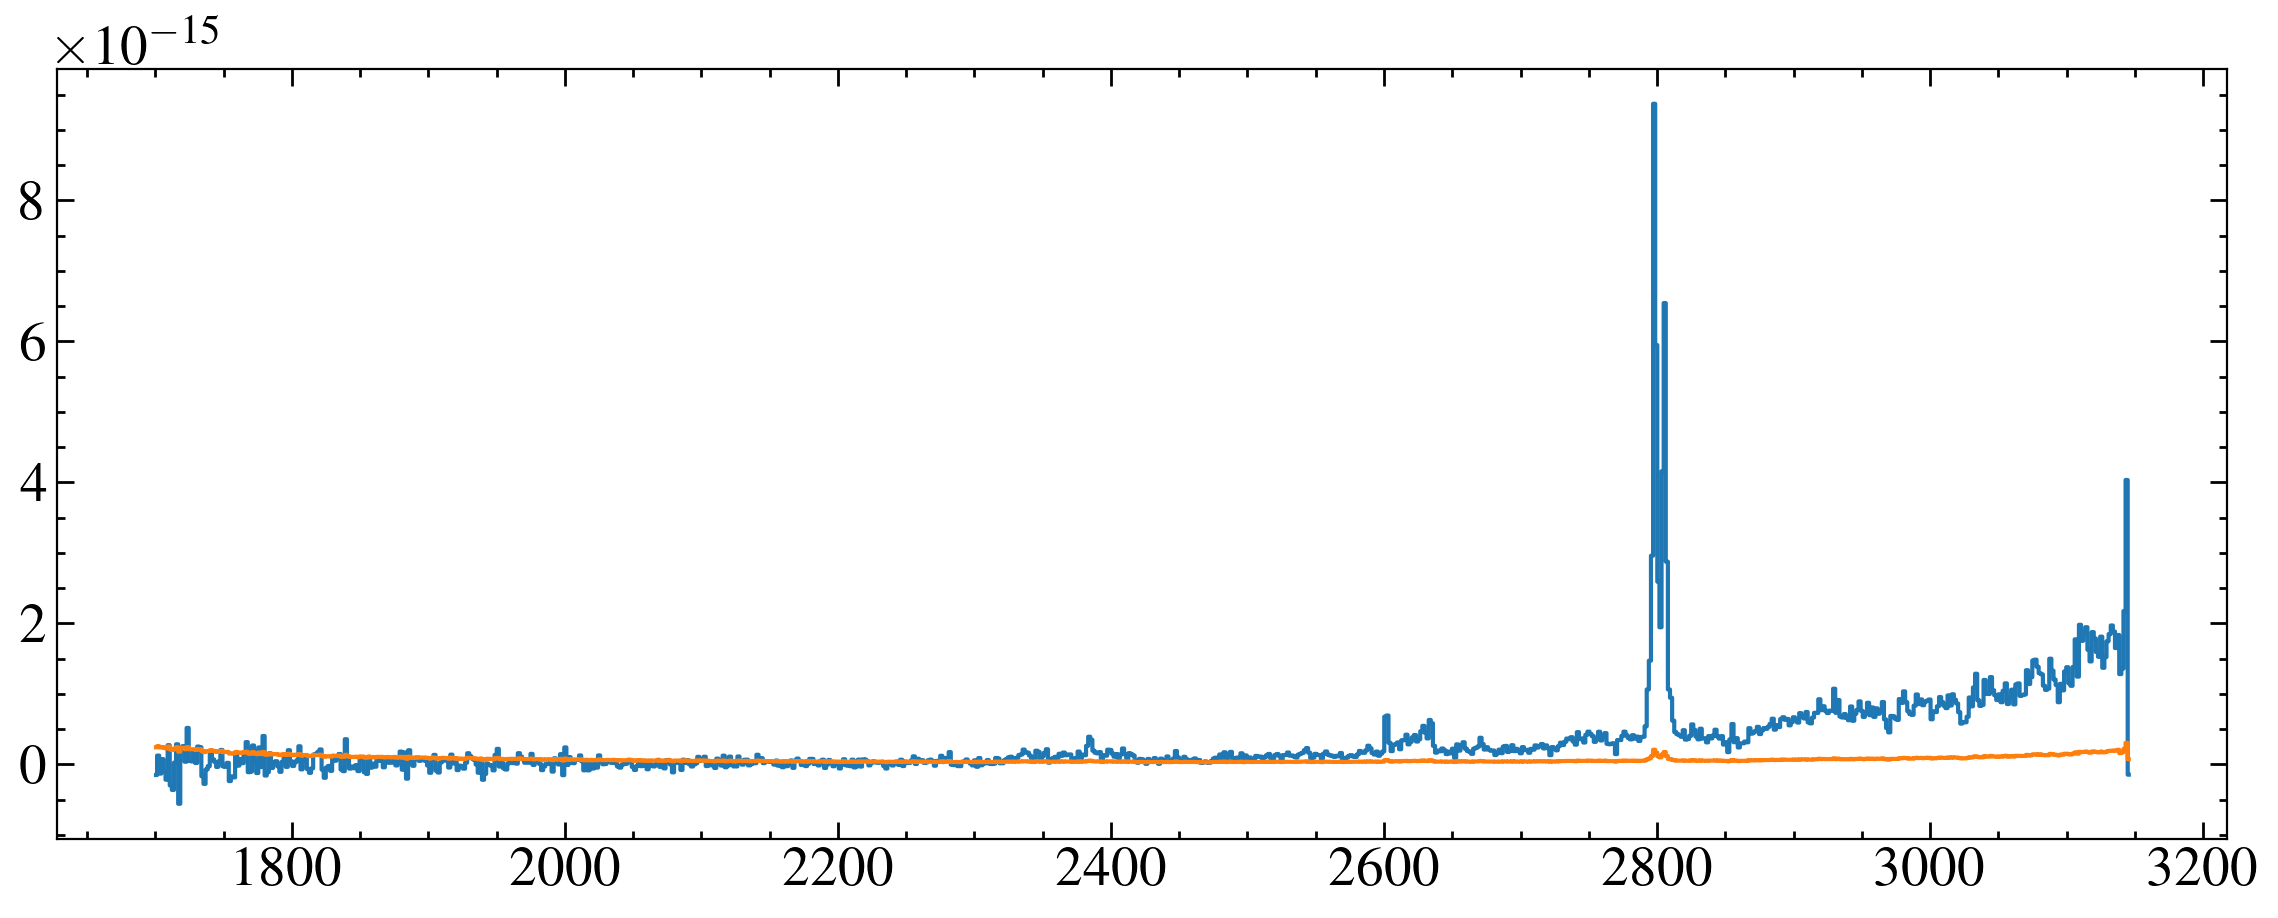

/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo15020_x1d.fits
G140L
143.713


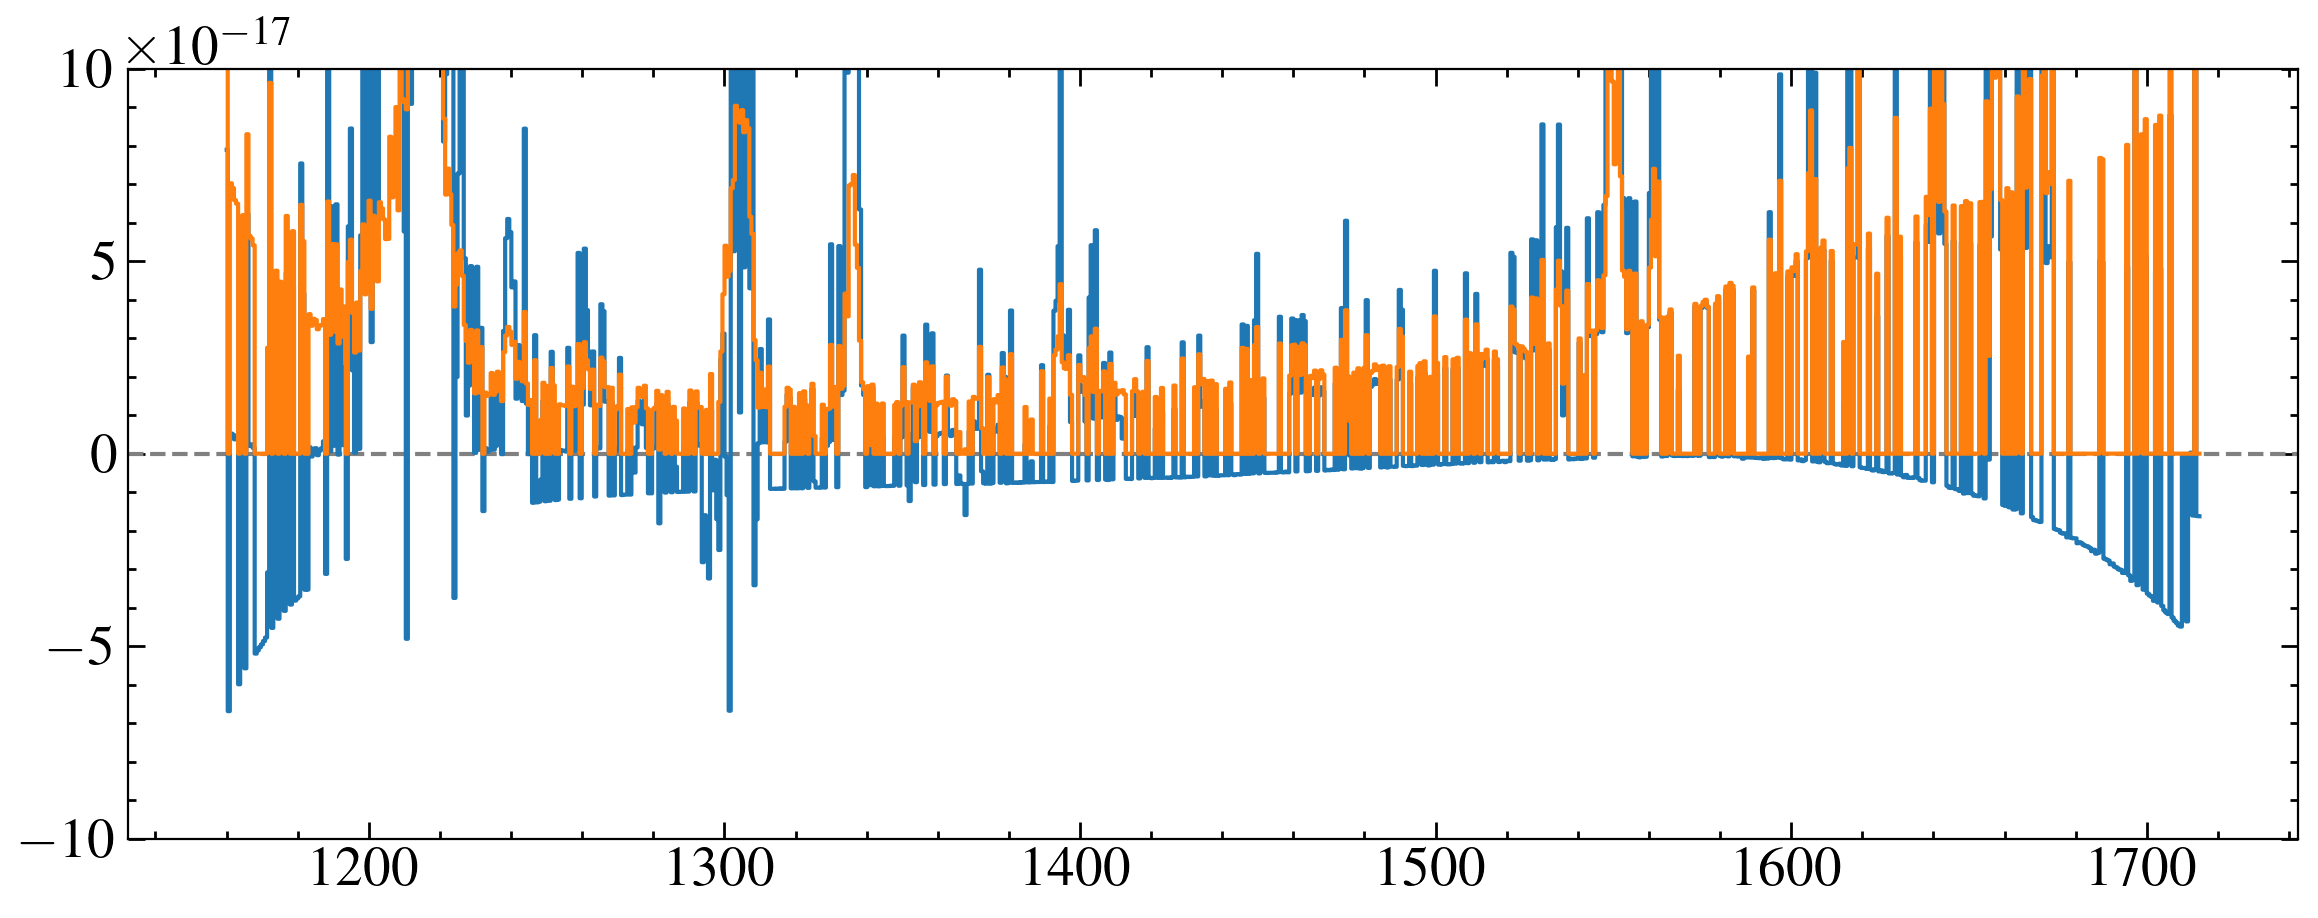

/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo15030_x1d.fits
G230L
535.2361


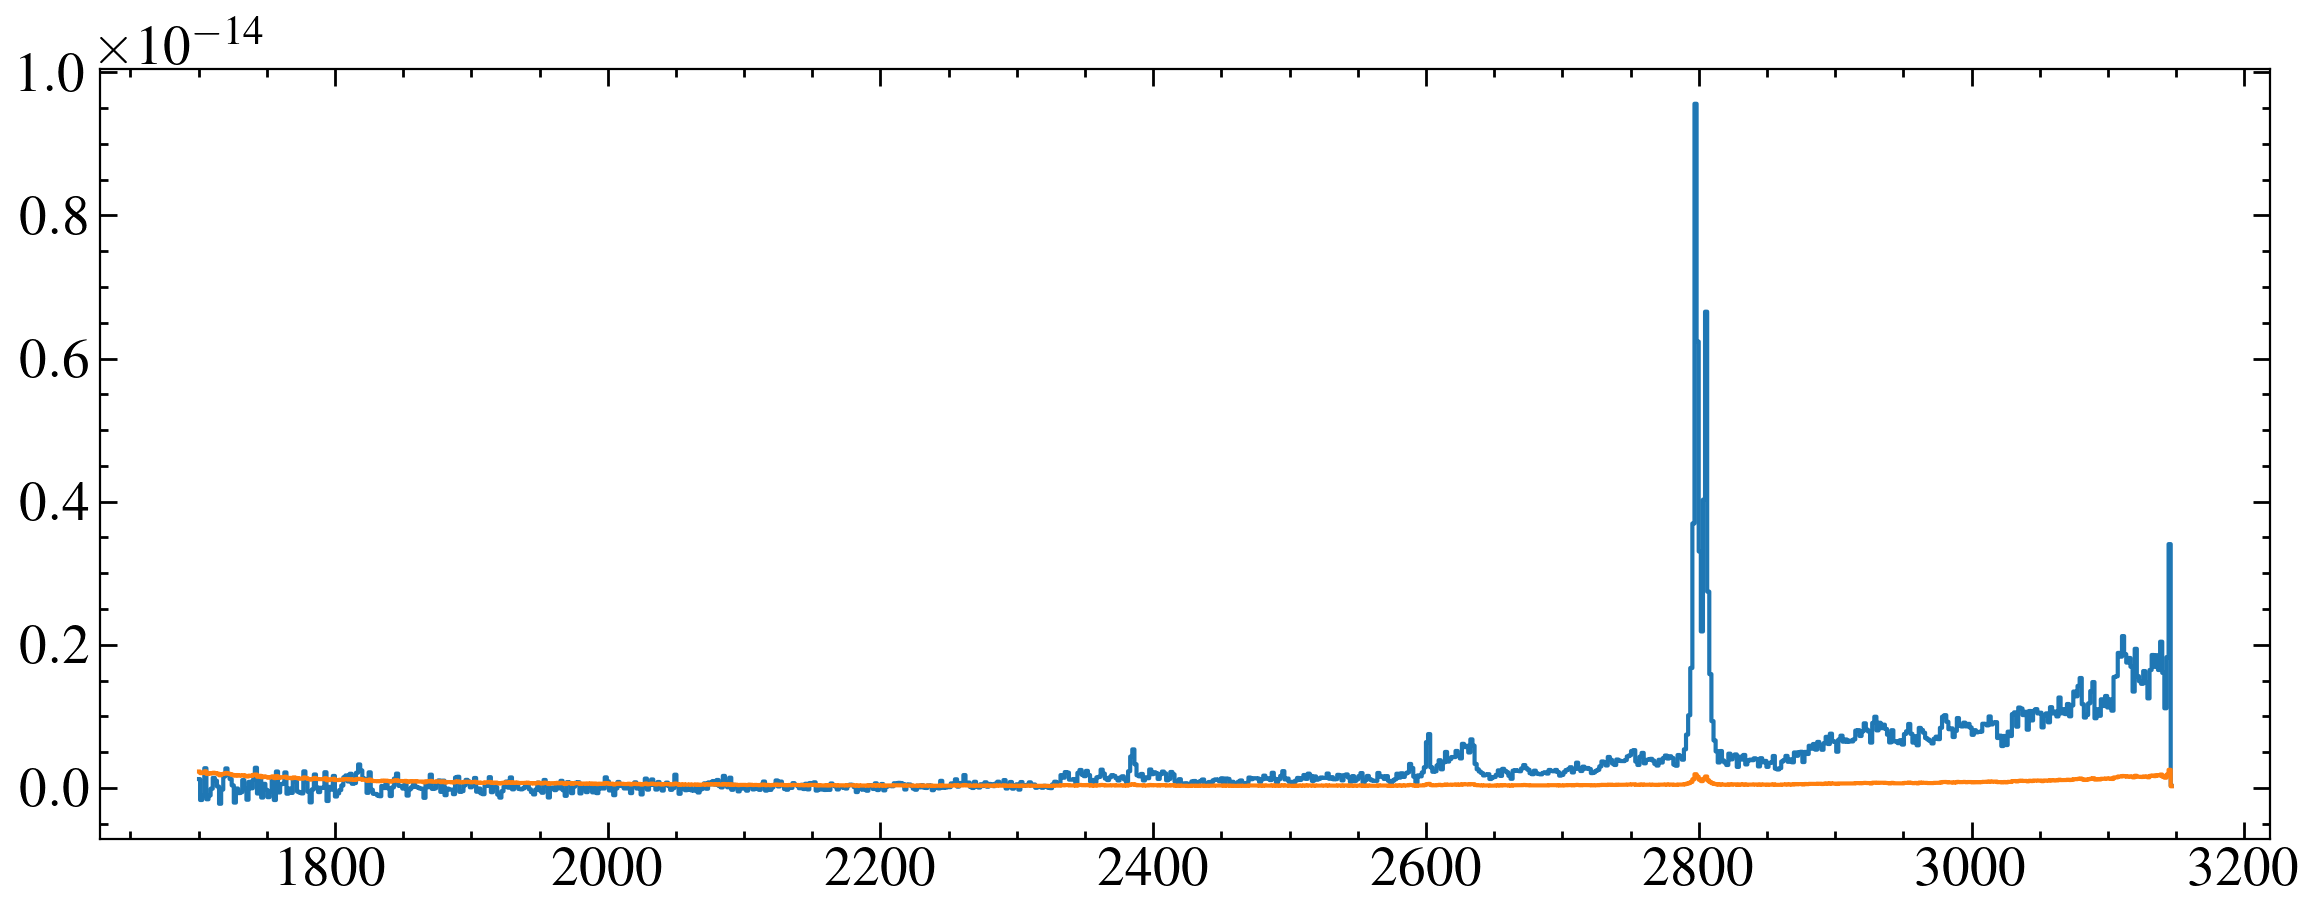

/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16010_x1d.fits
G140M
152.78192


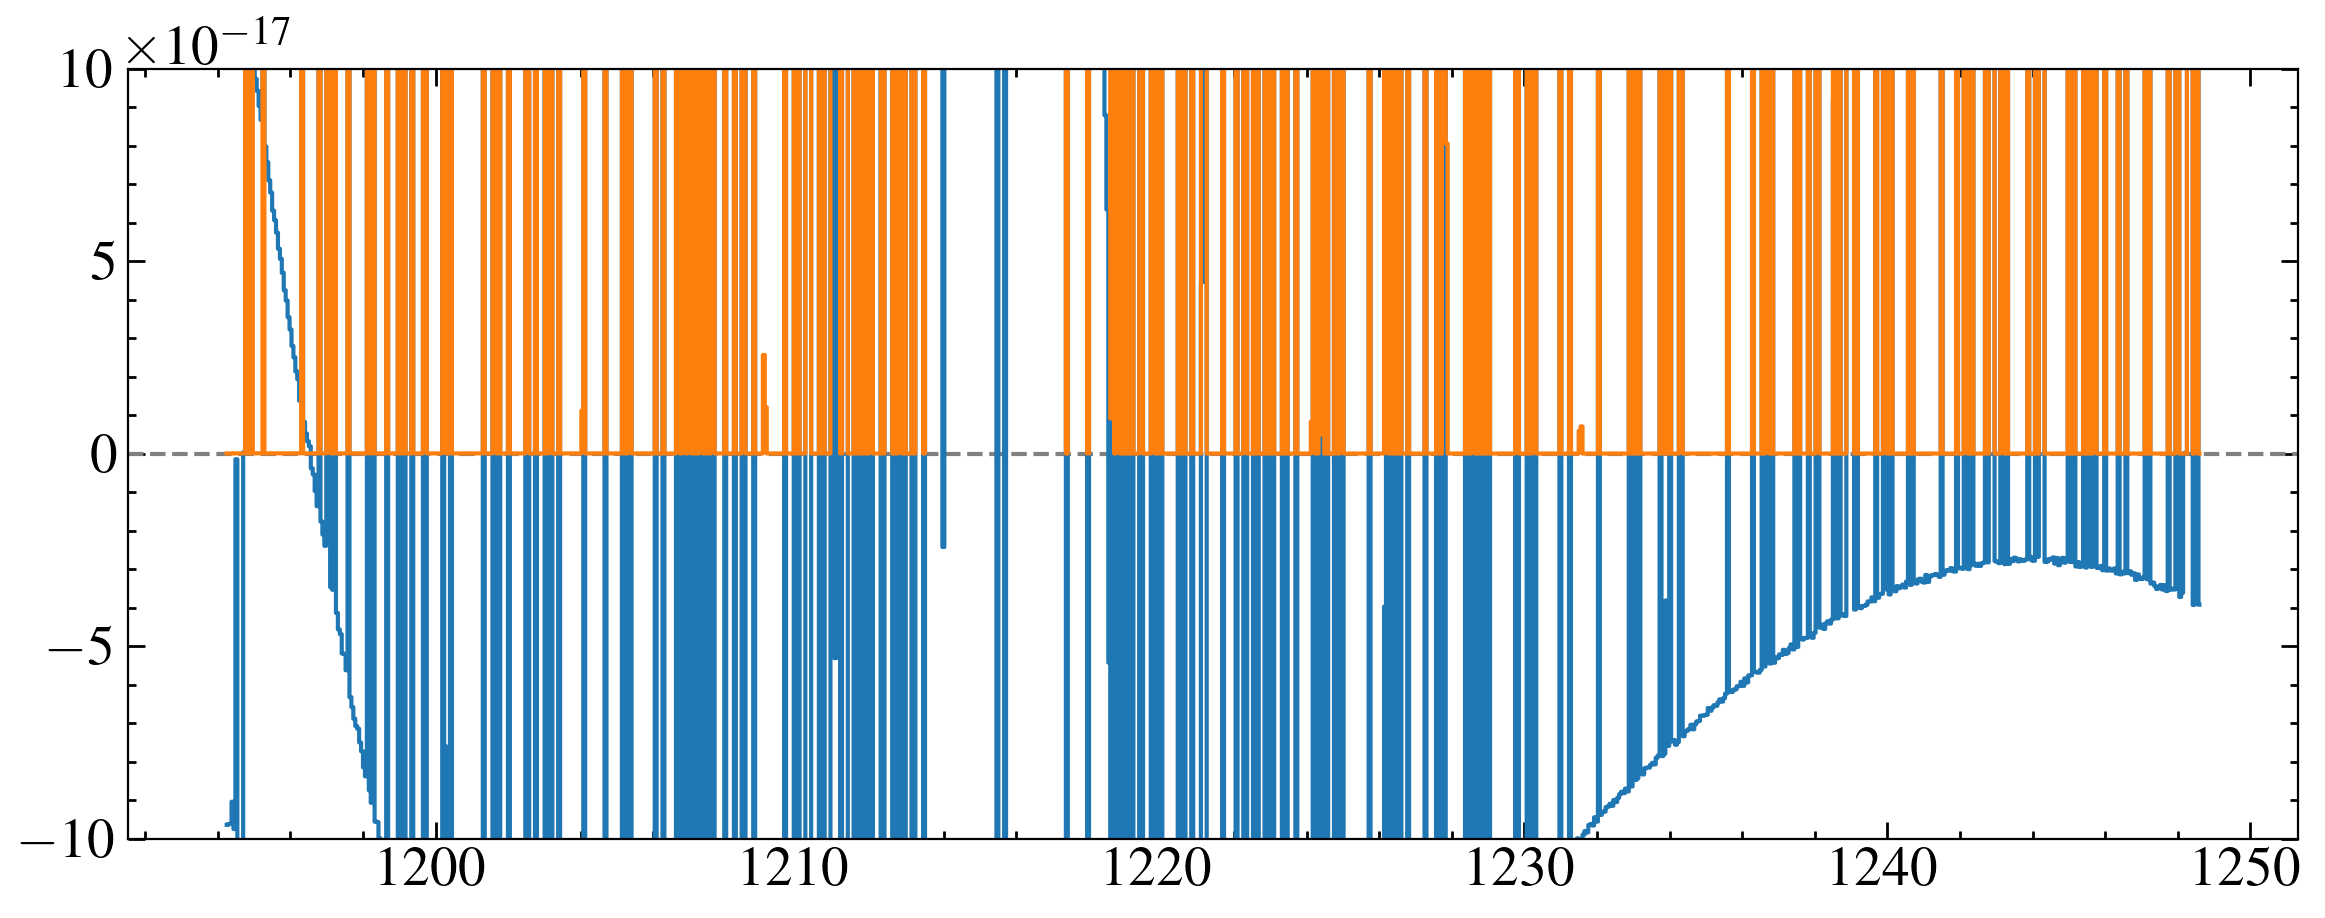

/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oei104010_x1d.fits
G140M
405.91272


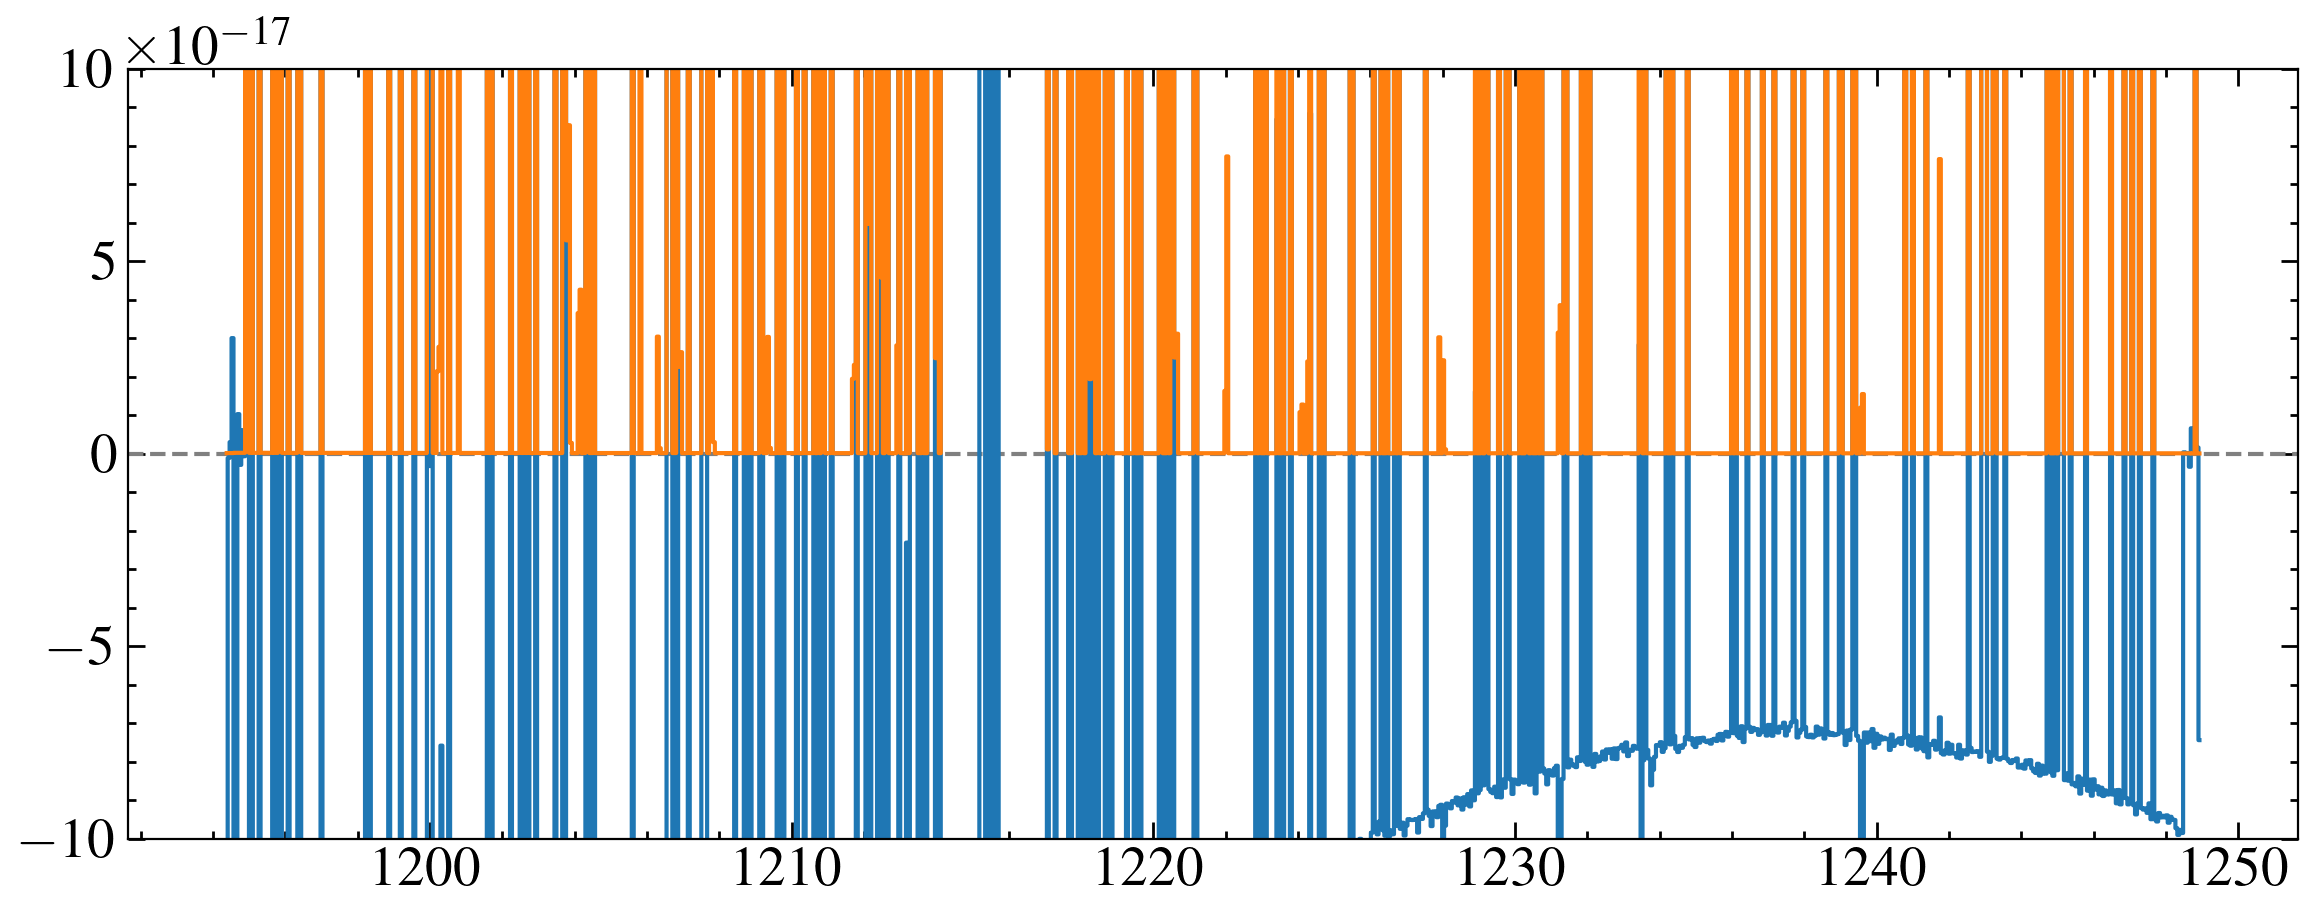

/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16040_sx1.fits
G430L
894.20105


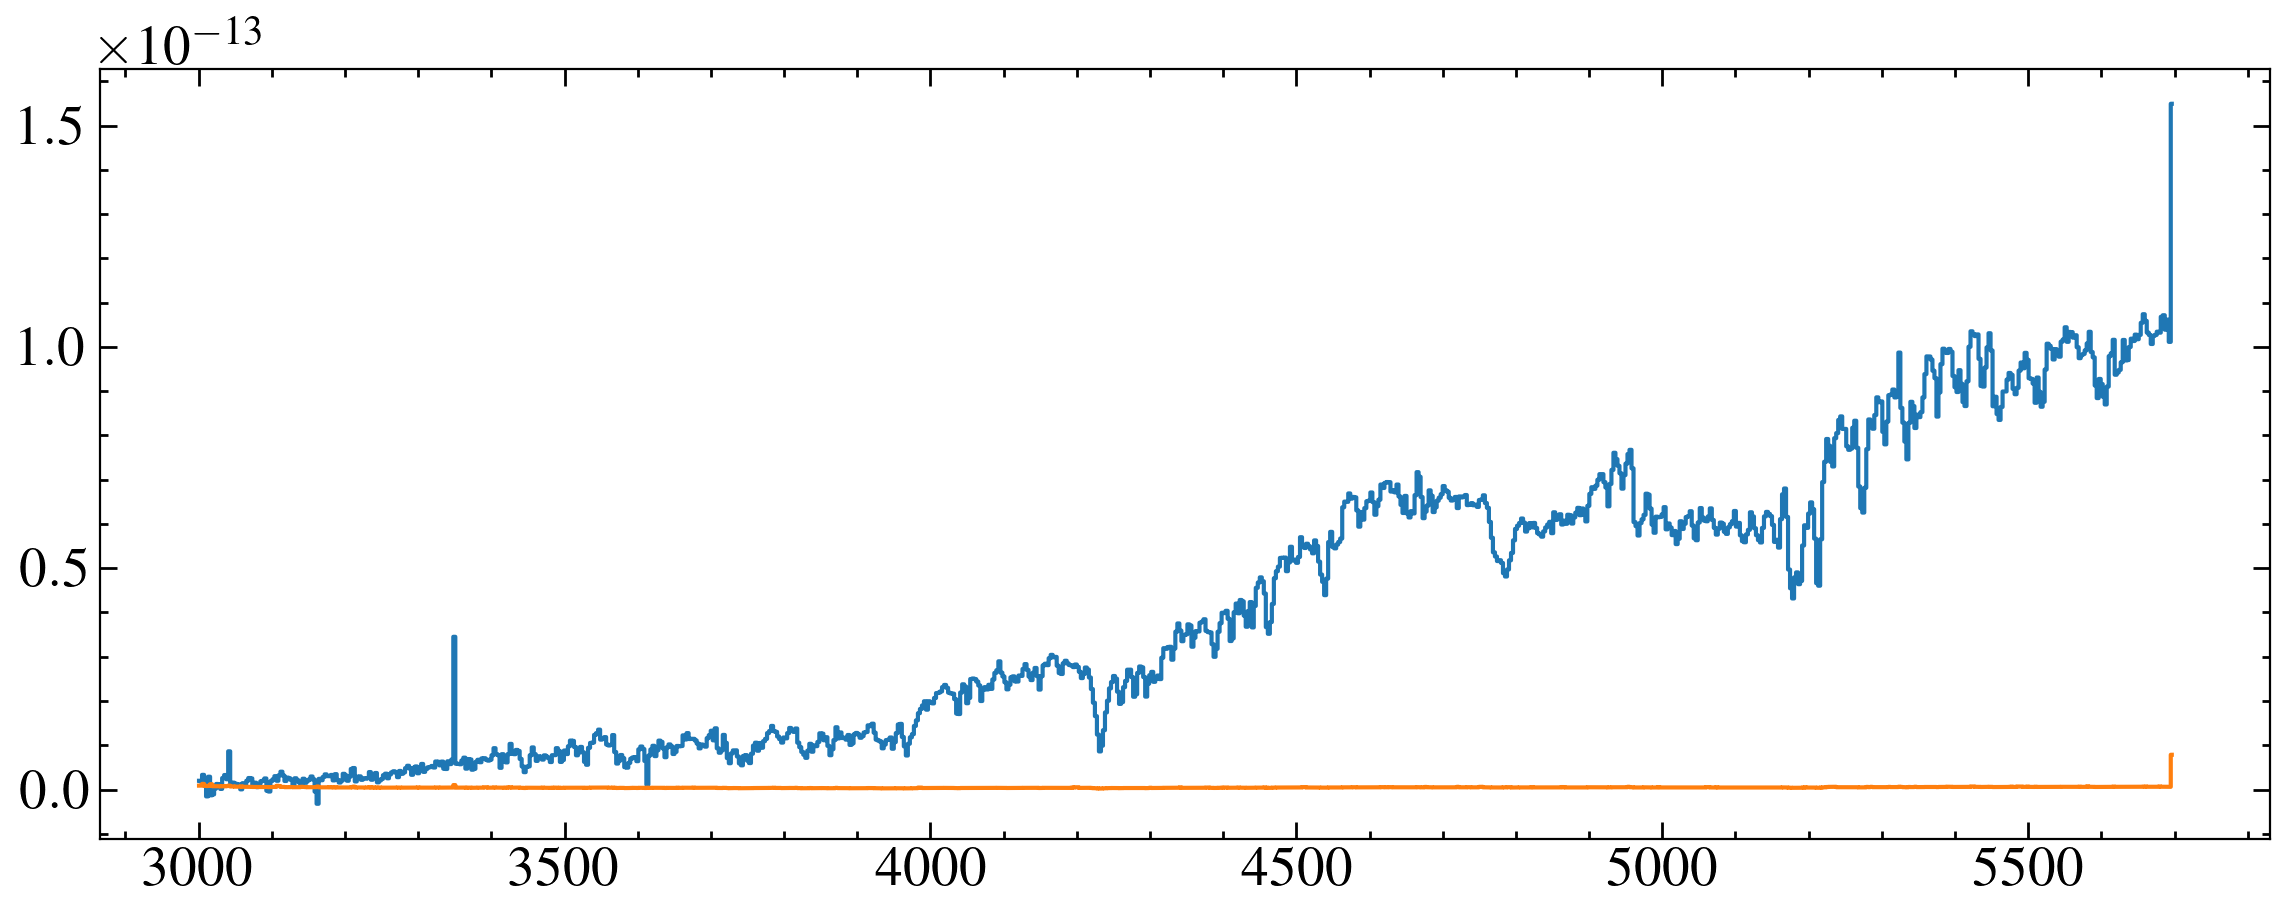

In [72]:
for x in x1ds:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating in ['G140M', 'G140L']:
        mask = (w > 1160)
        
        plt.ylim(-1e-16, 1e-16)
        plt.axhline(0, ls='--', c='0.5')
    if grating =='G230L':
        mask = (w > 1700)
    if grating =='G430L':
        mask = (w > 3000)
    
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    plt.step(w, e, where='mid')
    plt.show()
    

/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16030_x1d.fits
G230L
547.3228
/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo15030_x1d.fits
G230L
535.2361


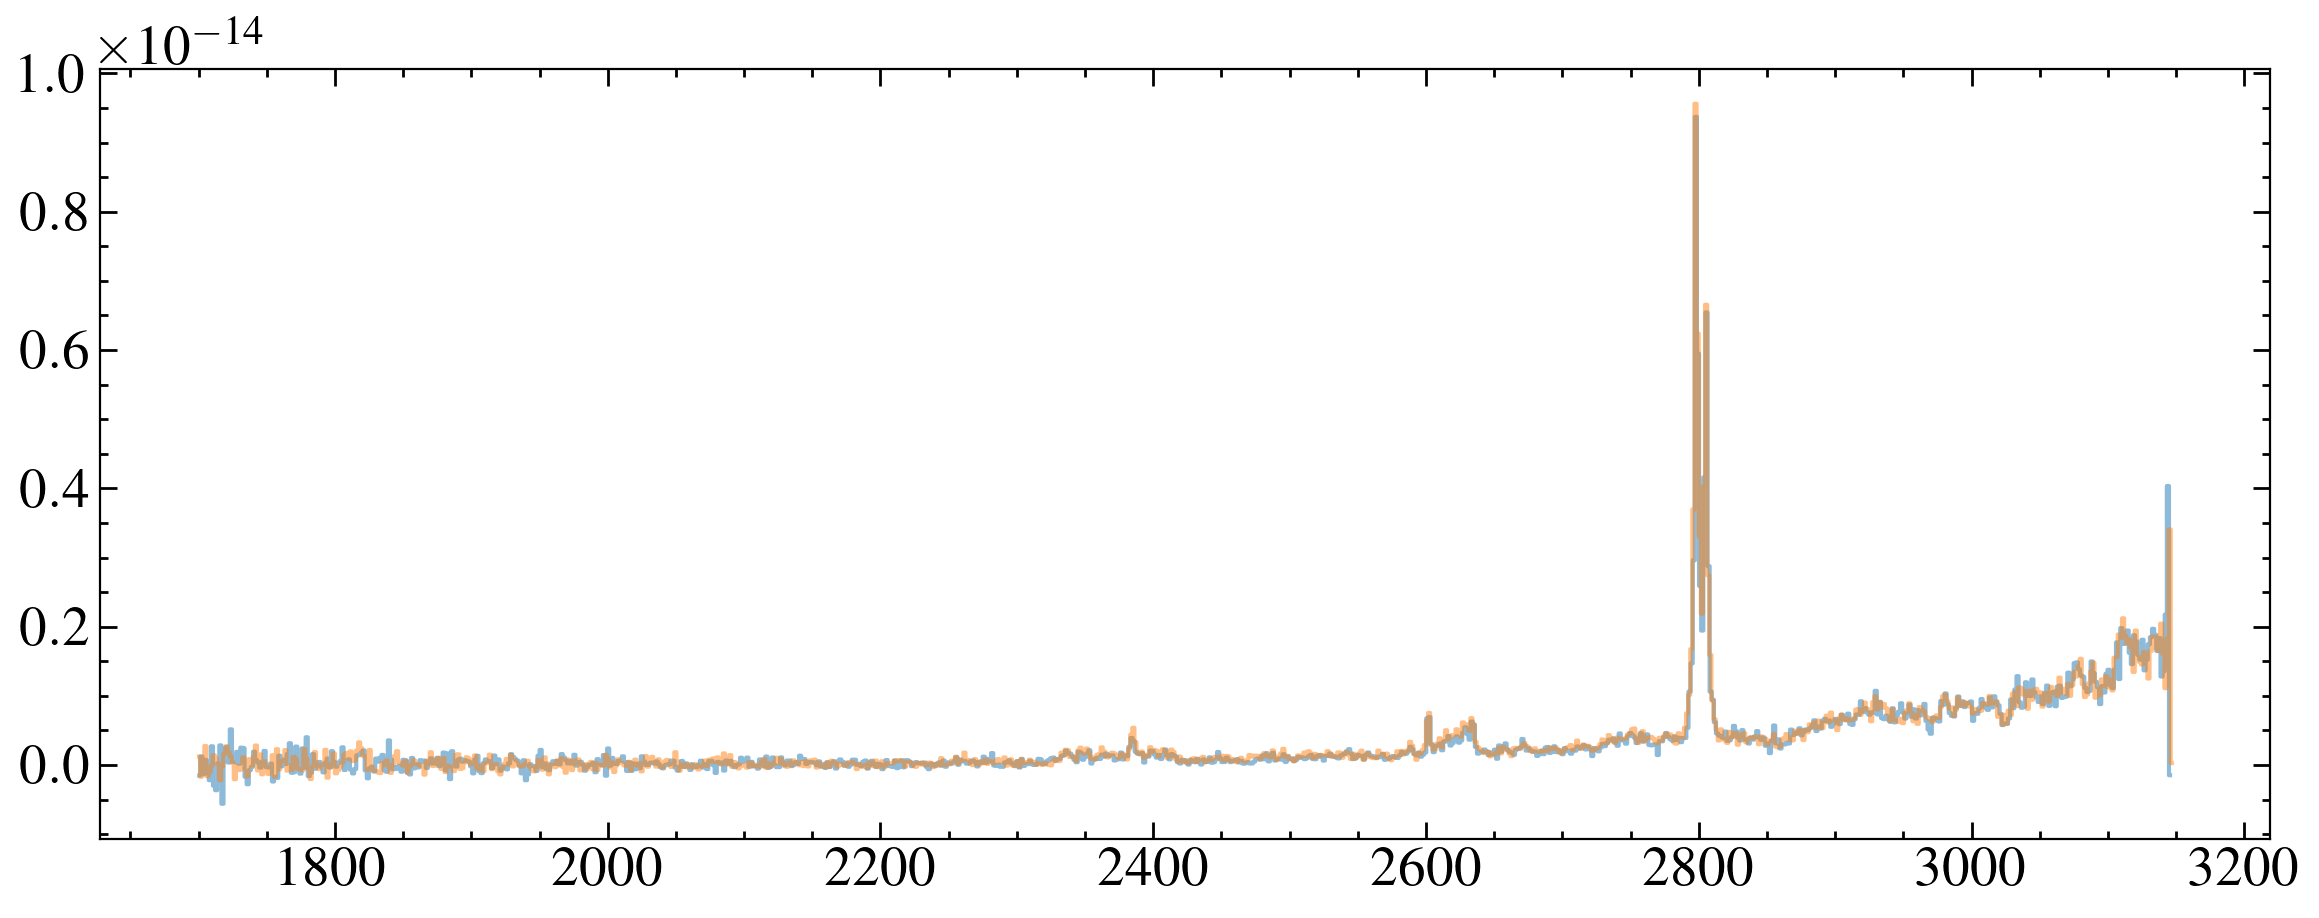

In [5]:
for x in x1ds:
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    if grating == 'G230L':
        print(x)
        print(grating)
        
        data = fits.getdata(x, 1)[0]
        print(data['A2Center'])
        w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
        if grating in ['G140M', 'G140L']:
            mask = (w > 1160)
        if grating =='G230L':
            mask = (w > 1700)
        if grating =='G430L':
            mask = (w > 3000)

        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid', alpha=0.5)
    # plt.step(w, e, where='mid')
    # plt.show()
    

/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oei103010_x1d.fits
G140M
403.75333
/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16020_x1d.fits
G140M
153.23633
/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16010_x1d.fits
G140M
152.78192
/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oei104010_x1d.fits
G140M
405.91272


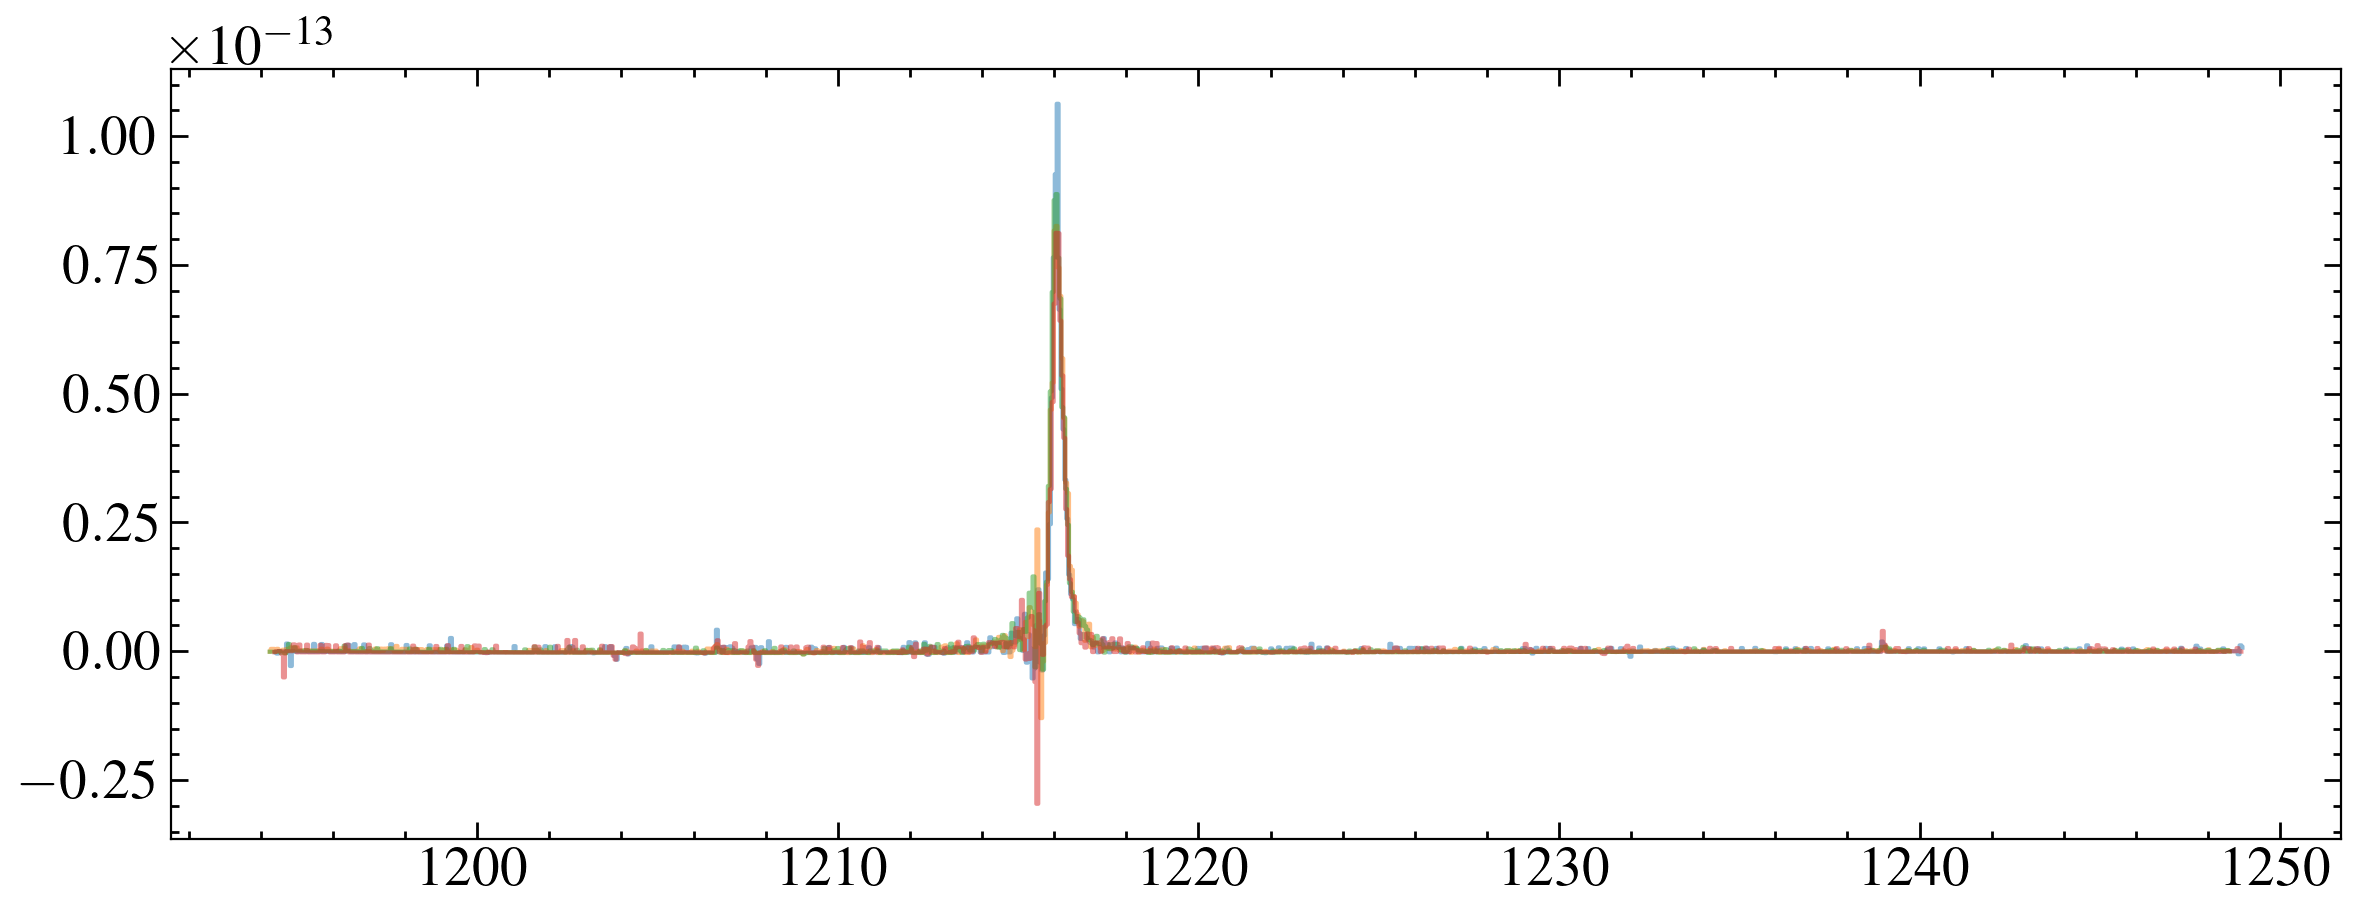

In [6]:
for x in x1ds:
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    if grating == 'G140M':
        print(x)
        print(grating)
        
        data = fits.getdata(x, 1)[0]
        print(data['A2Center'])
        w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
        if grating in ['G140M', 'G140L']:
            mask = (w > 1160)
        if grating =='G230L':
            mask = (w > 1700)
        if grating =='G430L':
            mask = (w > 3000)

        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid', alpha=0.5)
    # plt.step(w, e, where='mid')
    # plt.show()
    

/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oei103010_x1d.fits
G140M
403.75333
/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo14010_x1d.fits
G140L
514.2295
/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo14020_x1d.fits
G140L
514.3294
/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo14030_x1d.fits
G140L
514.2828
/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo15010_x1d.fits
G140L
143.5563
/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16020_x1d.fits
G140M
153.23633
/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16030_x1d.fits
G230L
547.3228
/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo15020_x1d.fits
G140L
143.713
/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo15030_x1d.fits
G230L
535.2361
/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16010_x1d.fits
G140M
152.78192
/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oei104010_x1d.fits
G140M
405.91272
/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16040_sx1.fits
G430L
894.20105


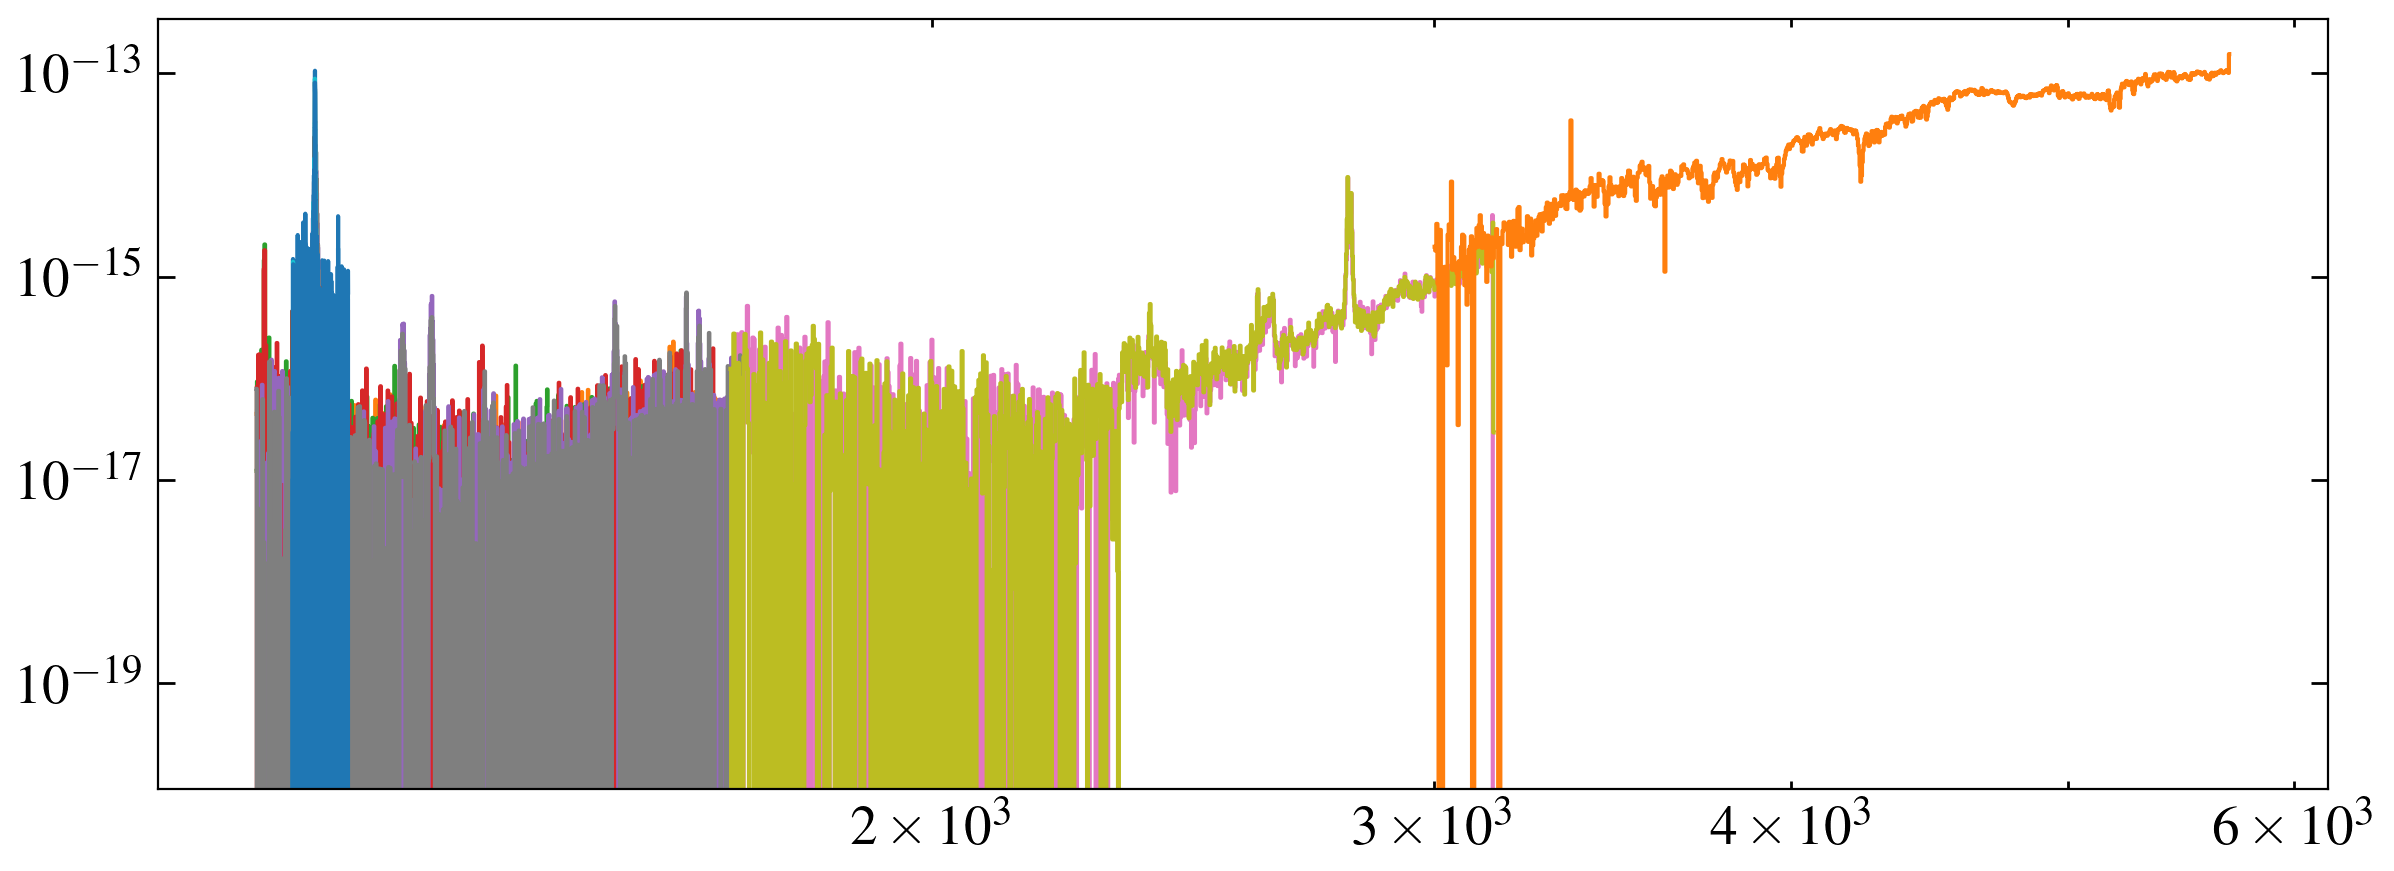

In [7]:
for x in x1ds:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating in ['G140M', 'G140L']:
        mask = (w > 1160)
    if grating =='G230L':
        mask = (w > 1700)
    if grating =='G430L':
        mask = (w > 3000)
    
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid')
    # plt.show()
    plt.xscale('log')
    plt.yscale('log')
    

In [8]:
def spectra_adder(f_array, e_array, scale_correct=True):
    """
    Returns a variance-weighted coadd with standard error of the weighted mean (variance weights, scale corrected).
    f_array and e_arrays are collections of flux and error arrays, which should have the same lenth and wavelength scale
    """
    weights = 1 / (e_array**2)
    flux = np.average(f_array, axis =0, weights = weights)
    var = 1 / np.sum(weights, axis=0)
    rcs = np.sum((((flux - f_array)**2) * weights), axis=0) / (len(f_array)-1) #reduced chi-squared
    if scale_correct:
        error = (var * rcs)**0.5
    else:
        error = var**2
    return flux,error

In [9]:
for x in x1ds:
    # print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)

G140M
G140L
G140L
G140L
G140L
G140M
G230L
G140L
G230L
G140M
G140M
G430L


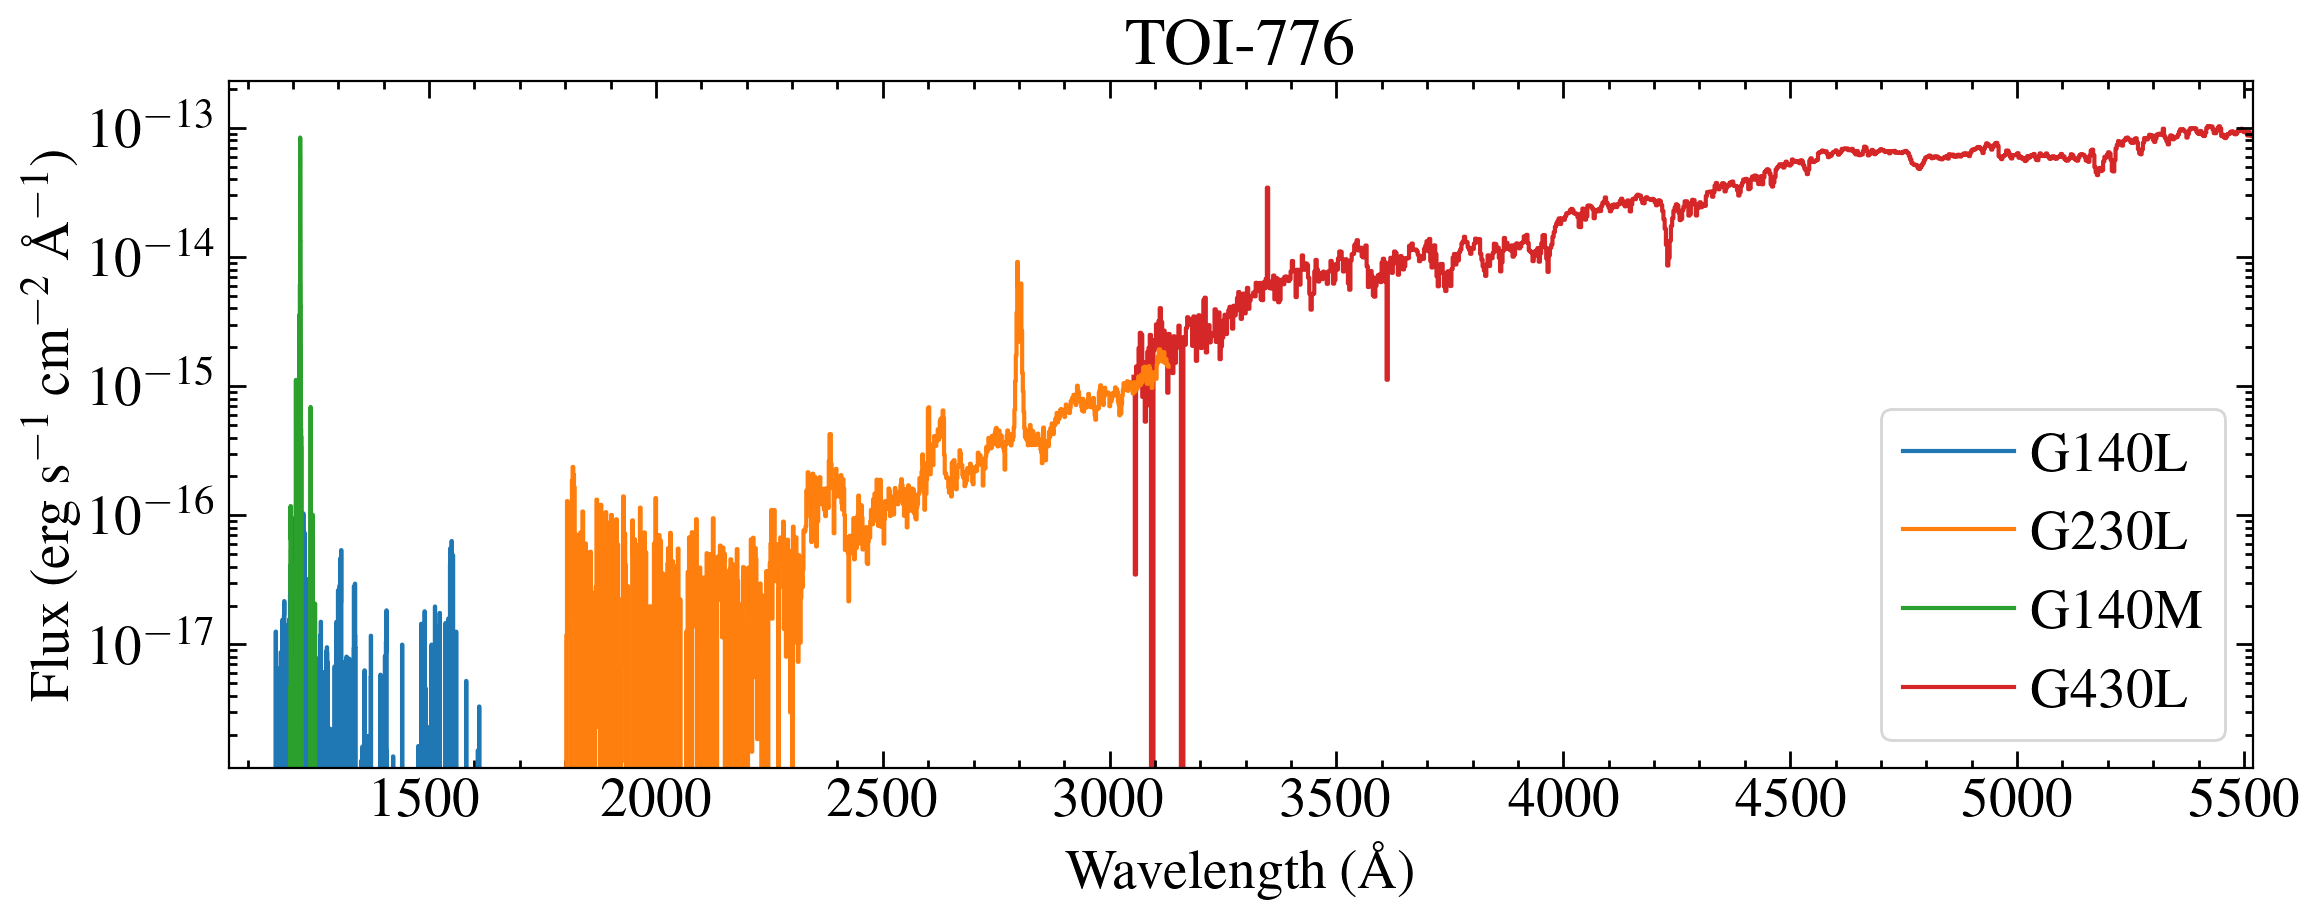

In [10]:
plt.figure(figsize=(12, 5))

f_nuv = []
e_nuv = []
f_fuv = []
e_fuv = []
f_lya = []
e_lya = []

n=0
o=0
p=0
for x in x1ds:
    data = fits.getdata(x, 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    grating = fits.getheader(x, 0)['OPT_ELEM']
    if grating == 'G230L':
        mask = (w > 1800) & (w <3130)
        w, f, e = w[mask], f[mask], e[mask]
        if n == 0:
            w_nuv = w
            f_nuv.append(f)
            e_nuv.append(e)
        else:
            f_nuv.append(interp1d(w, f, fill_value='extrapolate')(w_nuv))
            e_nuv.append(interp1d(w, e, fill_value='extrapolate')(w_nuv))            
        n +=1
    if grating == 'G140L':
        mask = (w > 1160)# & (w <1700)
        w, f, e = w[mask], f[mask], e[mask]
        if o == 0:
            w_fuv = w
            f_fuv.append(f)
            e_fuv.append(e)
        else:
            f_fuv.append(interp1d(w, f, fill_value='extrapolate')(w_fuv))
            e_fuv.append(interp1d(w, e, fill_value='extrapolate')(w_fuv))            
        o +=1
    if grating == 'G140M':
        # mask = (w > 1160) & (w <1700)
        # w, f, e = w[mask], f[mask], e[mask]
        if p == 0:
            w_lya = w
            f_lya.append(f)
            e_lya.append(e)
        else:
            f_lya.append(interp1d(w, f, fill_value='extrapolate')(w_lya))
            e_lya.append(interp1d(w, e, fill_value='extrapolate')(w_lya))            
        p +=1
    if grating == 'G430L':
        mask = (w > 3050) & (w <5520)
        w_opt, f_opt, e_opt = w[mask], f[mask], e[mask]
        
f_nuv, e_nuv = spectra_adder(np.array(f_nuv), np.array(e_nuv), scale_correct=True)
f_fuv, e_fuv = spectra_adder(np.array(f_fuv), np.array(e_fuv), scale_correct=True)
f_lya, e_lya = spectra_adder(np.array(f_lya), np.array(e_lya), scale_correct=True)

plt.step(w_fuv, f_fuv, label='G140L')
plt.step(w_nuv, f_nuv, label='G230L')
plt.step(w_lya, f_lya, label='G140M')
plt.step(w_opt, f_opt, label='G430L', zorder=-1)

plt.yscale('log')
# plt.xscale('log')
plt.ylim(1.1e-18)
plt.xlim(1060, 5520)
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(frameon=True, loc=4)
plt.title('TOI-776')
plt.tight_layout()
plt.savefig('plots/toi-776_ql.pdf')
plt.savefig('plots/toi-776_ql.png', facecolor='w')

Remember to reextract!!!! Doing now...

In [11]:
def build_trace_grid(SPTRCTAB, grating, cenwave):
    """
    Extends a grid of trace displacements to cover all y positions
    """
    data = fits.getdata(SPTRCTAB, 1)
    tracedata = data[(data['OPT_ELEM']==grating) & (data['CENWAVE'] == cenwave)]
    all_y = np.arange(len(tracedata[0]['A2DISPL']))
    grid = interp1d(tracedata['A2CENTER'], tracedata['A2DISPL'], axis=0, fill_value='extrapolate')(all_y)
    tracegrid = [a+b for a, b in zip(grid, all_y)] 
    return tracegrid
    
def get_a2center(x, y, tracegrid):
    """
    get the trace a2center at a1center
    """
    xcol = np.array(tracegrid)[:,int(x)]
    xind = (np.abs(xcol - y)).argmin()
    a2center = xind + 1 #calstis is 1-indexed 
    return a2center

In [12]:
import stistools
os.environ['oref'] = path

The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


In [23]:
roots = []
for x in x1ds:
    hdr = fits.getheader(x, 0)
    if hdr['OPT_ELEM'] == 'G140L':
         roots.append(hdr['ROOTNAME'])
print(roots)

['oeoo14010', 'oeoo14020', 'oeoo14030', 'oeoo15010', 'oeoo15020']


In [96]:
xs = [369, 371, 371, 371, 372]
ys = [131, 131, 131, 142, 142]

for i, root in  enumerate(roots):
    flt = '{}/{}_flt.fits'.format(path, root)
    SPTRCTAB = fits.getheader(flt,0)['SPTRCTAB']
    grating = fits.getheader(flt,0)['OPT_ELEM']
    cenwave = fits.getheader(flt,0)['CENWAVE']
    tracegrid = build_trace_grid(path+SPTRCTAB[5:], grating, cenwave)
    rootname = fits.getheader(flt)['ROOTNAME'] 
    outname = 'reextractions/toi-776/{}_new_x1d.fits'.format(rootname)
    a2center = get_a2center(xs[i],ys[i], tracegrid)
    print(root)
    print(a2center)
    # a2center = 375
    stistools.x1d.x1d(flt, output = outname, trailer='reextractions/toi-776/{}_new.trl'.format(rootname), a2center=a2center, maxsrch=5, bk1offst=-30, bk2offst=30,
                      bk1size=5, bk2size=5)
    print(fits.getdata('reextractions/toi-776/{}_new_x1d.fits'.format(rootname),1)['A2CENTER'])

oeoo14010
133
[131.72946]
oeoo14020
133
[131.72417]
oeoo14030
133
[131.4308]
oeoo15010
144
[143.43283]
oeoo15020
144
[143.65228]


reextractions/toi-776/oeoo15020_new_x1d.fits
G140L
143.65228
reextractions/toi-776/oeoo14030_new_x1d.fits
G140L
131.4308
reextractions/toi-776/oeoo15010_new_x1d.fits
G140L
143.43283
reextractions/toi-776/oeoo14020_new_x1d.fits
G140L
131.72417
reextractions/toi-776/oeoo14010_new_x1d.fits
G140L
131.72946


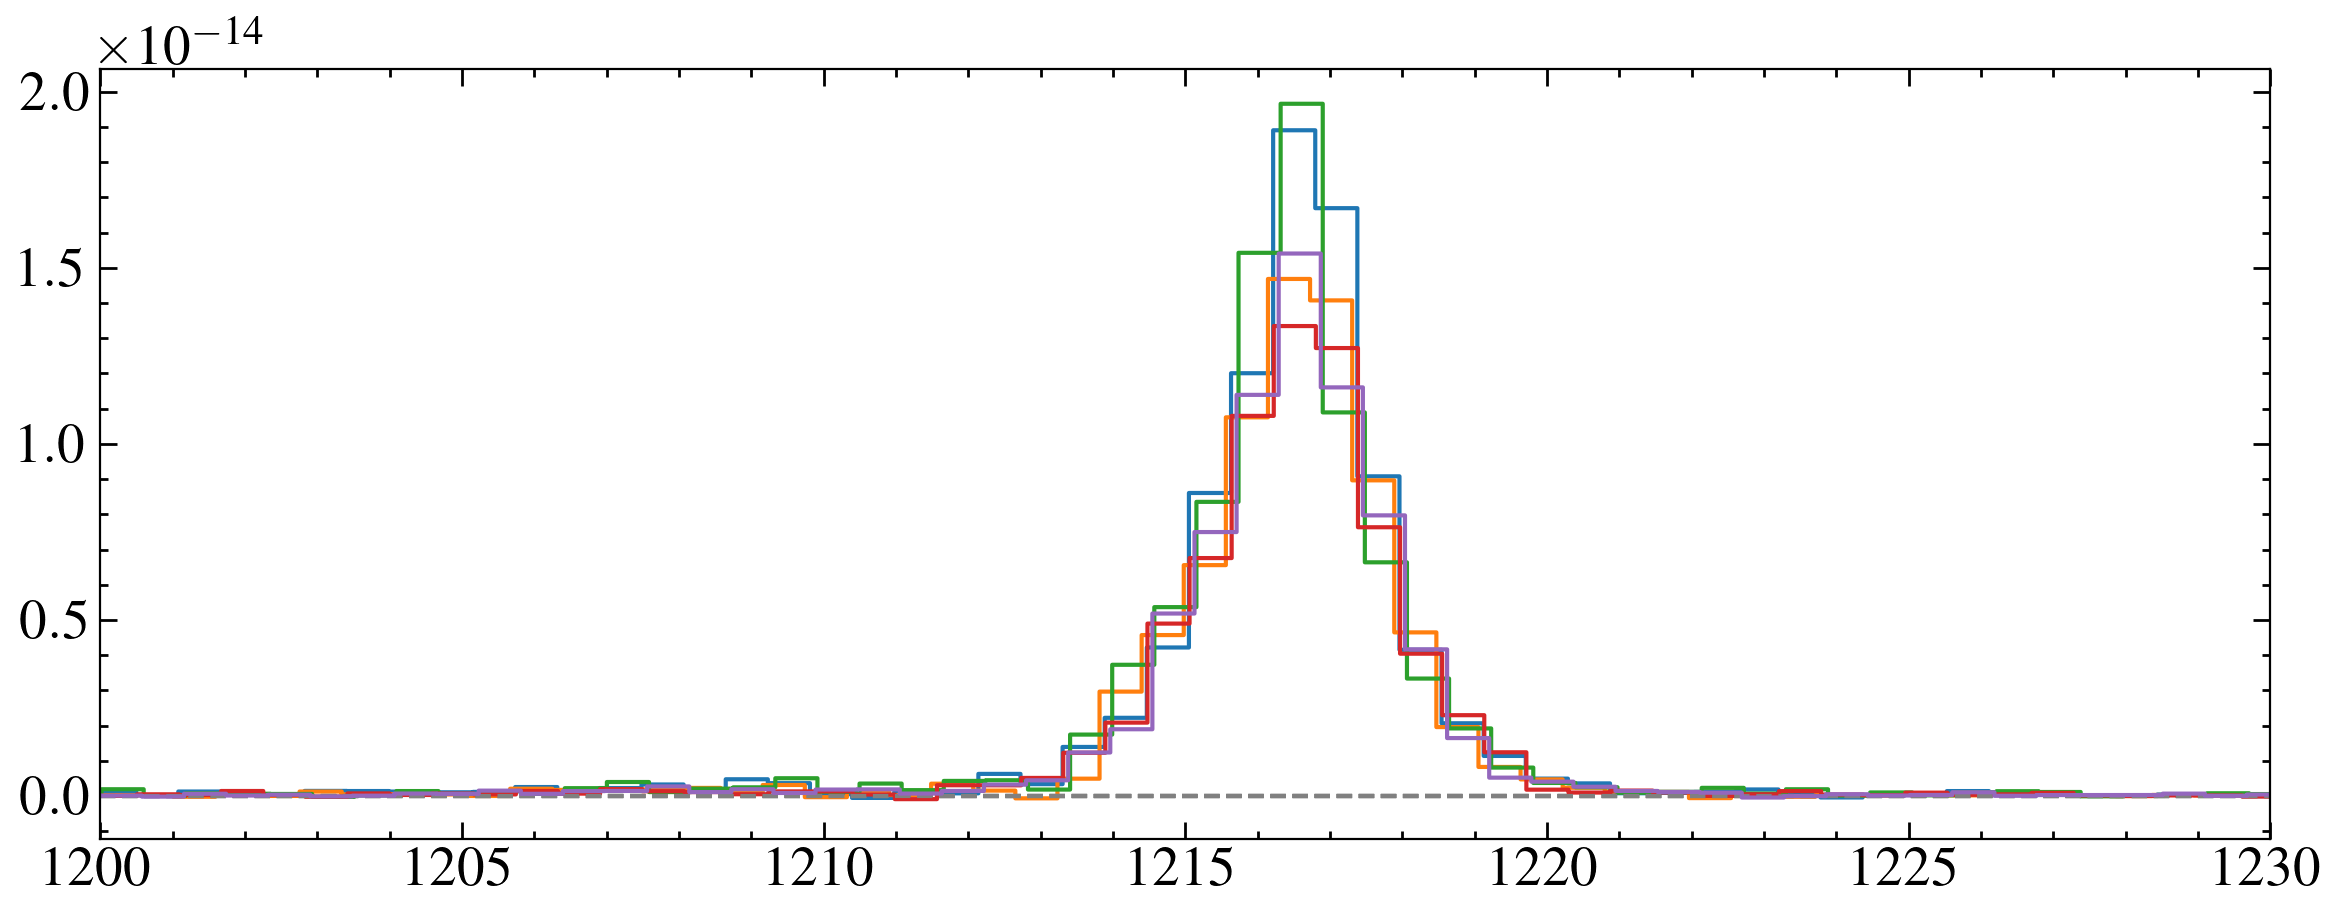

In [106]:
new_x1ds = glob.glob('reextractions/toi-776/*new_x1d.fits')

for x in new_x1ds:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating in ['G140M', 'G140L']:
        mask = (w > 1160) #& (w < 1210) | (w > 1220)
    # if grating =='G230L':
        # mask = (w > 1700) 
    # if grating =='G430L':
        # mask = (w > 3000)
    
    w, f, e = w[mask], f[mask], e[mask]
    # plt.ylim(-1e-16, 1e-16)
    plt.axhline(0, ls='--', c='0.5')
    plt.xlim(1200, 1230)

    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid')
    # plt.show()
    


In [29]:
print(roots)
print(x1ds)

['oeoo14010', 'oeoo14020', 'oeoo14030', 'oeoo15010', 'oeoo15020']
['/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oei103010_x1d.fits'
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo14010_x1d.fits'
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo14020_x1d.fits'
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo14030_x1d.fits'
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo15010_x1d.fits'
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16020_x1d.fits'
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16030_x1d.fits'
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo15020_x1d.fits'
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo15030_x1d.fits'
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16010_x1d.fits'
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oei104010_x1d.fits'
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16040_sx1.fits']


In [33]:
use_x1ds = np.hstack((['/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oei103010_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16020_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16030_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo15030_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16010_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oei104010_x1d.fits',
 '/media/david/2tb_ext_hd/hddata/meats/hst/toi-776/oeoo16040_sx1.fits'], new_x1ds))



In [101]:
def no_zero_errors(flux, error):
    """
    Corrects instances where negative flux measurements have very small errors
    """
    e_new = error
    for i in range(len(error)):
        if flux[i] < 0.0 and error[i] < 0.1*abs(flux[i]):
            e_new[i] = abs(flux[i])
    return e_new

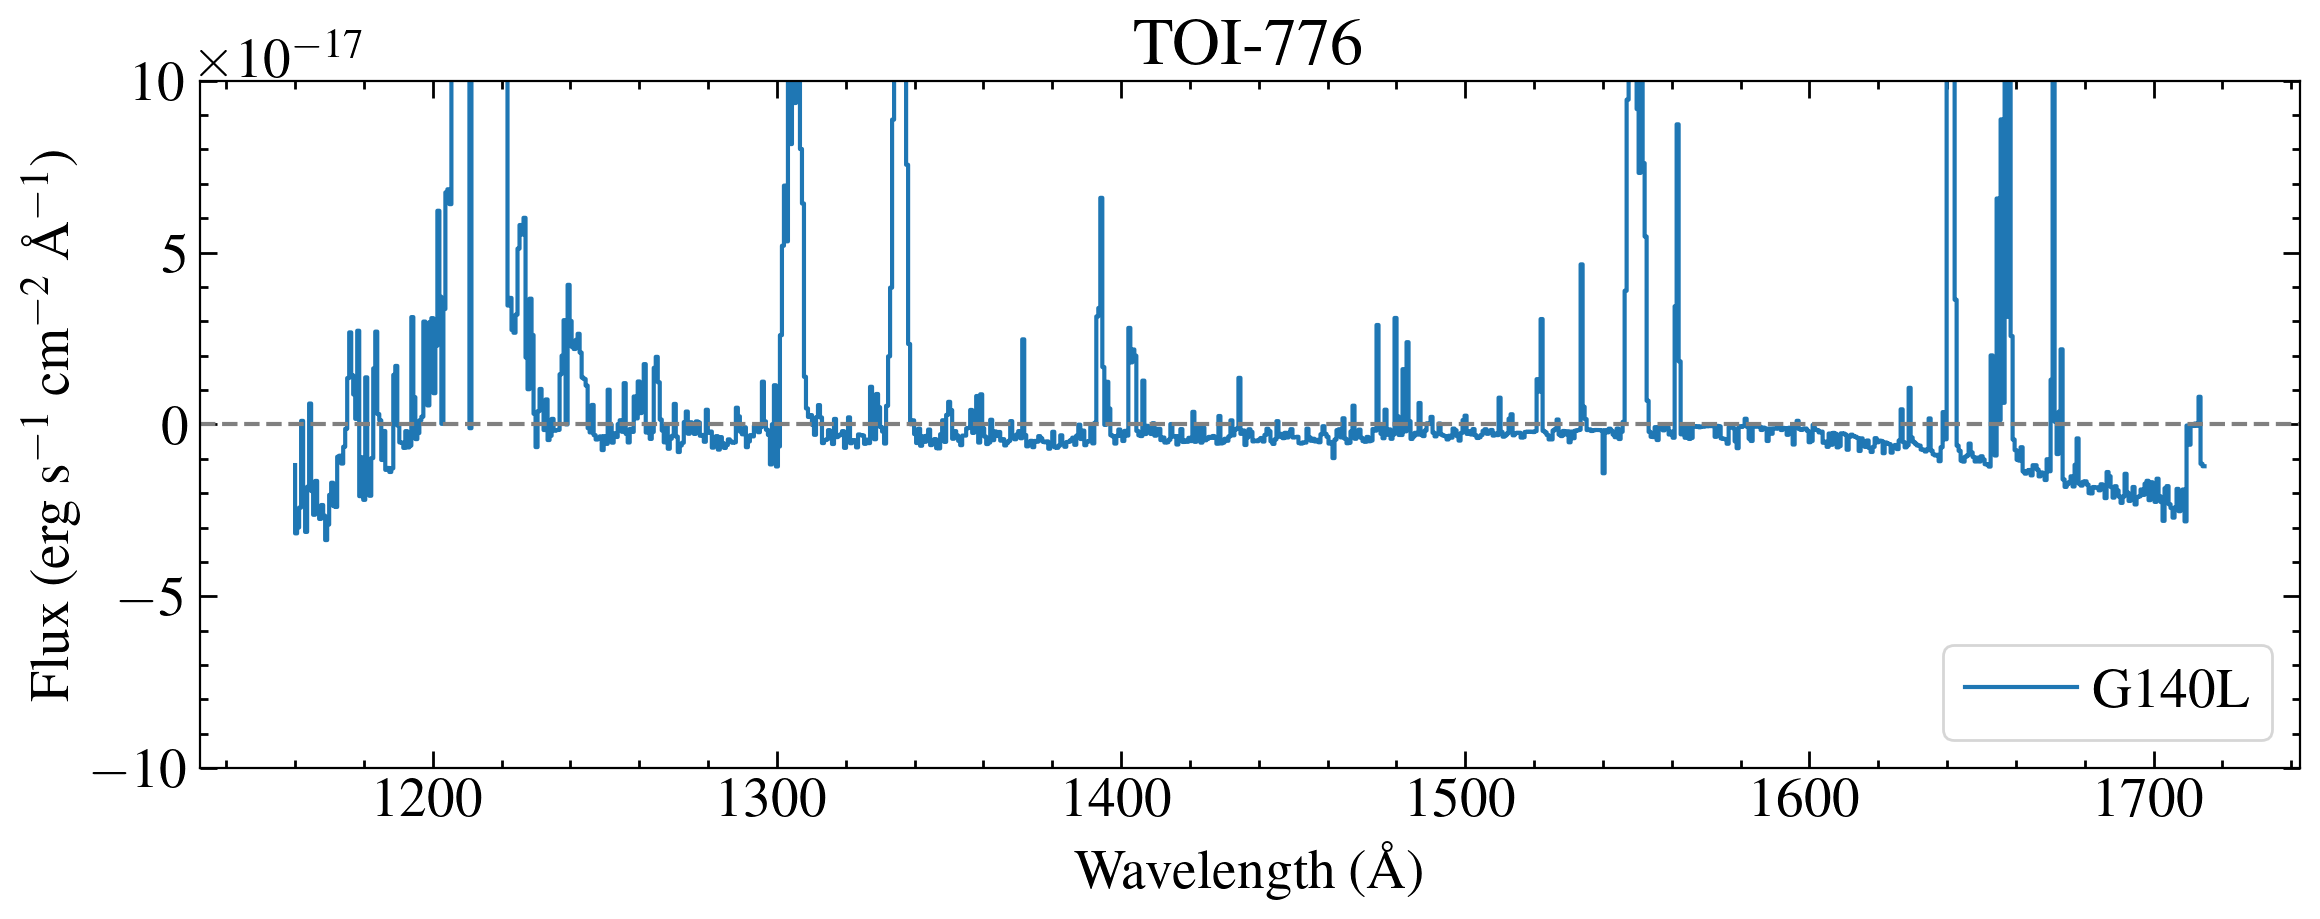

In [102]:
plt.figure(figsize=(12, 5))

f_nuv = []
e_nuv = []
f_fuv = []
e_fuv = []
f_lya = []
e_lya = []

n=0
o=0
p=0

for x in use_x1ds:
    data = fits.getdata(x, 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    grating = fits.getheader(x, 0)['OPT_ELEM']
    if grating == 'G230L':
        mask = (w > 1800) & (w <3130)
        w, f, e = w[mask], f[mask], e[mask]
        if n == 0:
            w_nuv = w
            f_nuv.append(f)
            e_nuv.append(e)
        else:
            f_nuv.append(interp1d(w, f, fill_value='extrapolate')(w_nuv))
            e_nuv.append(interp1d(w, e, fill_value='extrapolate')(w_nuv))            
        n +=1
    if grating == 'G140L':
        mask = (w > 1160)# & (w <1700)
        w, f, e = w[mask], f[mask], e[mask]
        e = no_zero_errors(f, e)
        if o == 0:
            w_fuv = w
            f_fuv.append(f)
            e_fuv.append(e)
        else:
            f_fuv.append(interp1d(w, f, fill_value='extrapolate')(w_fuv))
            e_fuv.append(interp1d(w, e, fill_value='extrapolate')(w_fuv))            
        o +=1
    if grating == 'G140M':
        # mask = (w > 1160) & (w <1700)
        # w, f, e = w[mask], f[mask], e[mask]
        if p == 0:
            w_lya = w
            f_lya.append(f)
            e_lya.append(e)
        else:
            f_lya.append(interp1d(w, f, fill_value='extrapolate')(w_lya))
            e_lya.append(interp1d(w, e, fill_value='extrapolate')(w_lya))            
        p +=1
    if grating == 'G430L':
        mask = (w > 3050) & (w <5520)
        w_opt, f_opt, e_opt = w[mask], f[mask], e[mask]
        
f_nuv, e_nuv = spectra_adder(np.array(f_nuv), np.array(e_nuv), scale_correct=True)
f_fuv, e_fuv = spectra_adder(np.array(f_fuv), np.array(e_fuv), scale_correct=True)
f_lya, e_lya = spectra_adder(np.array(f_lya), np.array(e_lya), scale_correct=True)

plt.step(w_fuv, f_fuv, label='G140L')
# plt.step(w_nuv, f_nuv, label='G230L')
# plt.step(w_lya, f_lya, label='G140M')
# plt.step(w_opt, f_opt, label='G430L', zorder=-1)

# plt.yscale('log')
# plt.xscale('log')
plt.ylim(-1e-16, 1e-16)
plt.axhline(0, ls='--', c='0.5')
# plt.ylim(1.1e-19)
# plt.xlim(1060, 5520)
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(frameon=True, loc=4)
plt.title('TOI-776')
plt.tight_layout()
# plt.savefig('plots/toi-776_ql.pdf')
# plt.savefig('plots/toi-776_ql.png', facecolor='w')